<img src="jade-wulfraat-yXnPoTkkY94-unsplash.jpg"  width="700" height="500"  align="center"/>
<font size="1" color="grey">free image from unsplash (https://unsplash.com/photos/yXnPoTkkY94)</font>

# European eating-out trends - some key insights from data exploration

## Table of Contents
1. [Introduction](#introduction)<br>
2. [Import the modules](#import_modules)<br>
3. [Import TripAdvisor dataset](#import_dataset)<br>
4. [Understanding_the_dataset](#understanding_the_dataset)<br>
5. [Data_wrangling](#data_wrangling)<br>
 5.1. [Drop useless columns](#drop_columns)<br>
 5.2. [Rename columns](#rename_columns)<br>
 5.3. [Remove duplicates](#remove_duplicates)<br>
 5.4. [Data transformation and missing values](#data_transfo_missing_values)<br>
 5.4.1. [Remove rows with missing values](#remove_rows)<br>
 5.4.2. [Price range column transformations](#price_range_transformations)<br>
 5.4.3. [Rating column transformations](#rating_transformations)<br>
 5.4.4. [Reviews column transformations](#reviews_transformations)<br>
 5.4.5. [Number of reviews column transformations](#reviews_number_transformations)<br>
 5.4.6. [Cuisine style column transformations](#cuisine_style_transformations)<br>
 5.5. [Dataset copies](#dataset_copies)<br>
 5.5.1. [1st_dataset copy](#1st_dataset_copy)<br>
 5.5.2. [2nd_dataset copy for cuisine style analysis](#2nd_dataset_copy)<br> 
6. [Data_exploration and vizualisations](#data_exploration)<br>
 6.1. [Categorial columns lists](#category_culumn_lists)<br>
 6.1.1. [Cities list](#cities_list)<br>
 6.1.2. [Cuisine_style list](#cuisine_style_list)<br>
 6.1.3. [Price range list](#price_range_list)<br>
 6.2. [Vizualisation functions](#functions)<br>
 6.2.1. [Histogram](#histogram)<br> 
 6.2.2. [Boxplot](#boxplot)<br> 
 6.2.3. [Barplot](#barplot)<br> 
 6.3. [Data analysis](#data_analysis)<br>
 6.3.1. [Distribution by city and price range of the number of restaurants](#distribution_number_of_restaurants)<br>
 6.3.2. [Analysis of the rating](#rating_analysis)<br>
 6.3.3. [Analysis of the Number of reviews](#number_of_reviews_analysis)<br> 
 6.3.4. [Relationship between the number of reviews and rating](#relationship_rating_number_reviews)<br> 
 6.3.5. [Analysis of the cuisine styles](#cuisine_styles_analysis)<br> 
 6.3.6. [Analysis of the words used in reviews](#words_in_reviews)<br>
 6.3.6.1. [cleanup of reviews field](#reviews_cleanup)<br> 
 6.3.6.2. [use_case analysis with wordcloud](#wordcloud_use_case)<br>  
7. [Conclusion](#conclusion)<br>  


<a id='introduction'></a>
## 1. Introduction


The purpose of this notebook is to analyse a dataset from Trip Advisor found on [kaggle](https://www.kaggle.com/damienbeneschi/krakow-ta-restaurans-data-raw). It contains interesting information about 125K restaurants, mostly regarding the city of the restaurant, their rating, their number of reviews, some customer reviews about them, the cuisine styles they offer and the price range they are associated to. The data date back to 2017-2018.
Let's remember that the rating is an indicator of customer satisfaction and the number of reviews is an indicator of frequentation.

The questions we would like to answer through this analysis are :
- If I travel in a city in Europe, what should I know about the eating out market in the city?
- What are the most global cities in terms of variety of cuisines?
- If I want to eat in a highly rated restaurant, can I expect to find some budget friendly restaurants?
- Is there a relationship between the rating of a restaurant and the number of reviews? 
- What can the words in customer reviews tell me about the customers sentiment for a given cuisine style in a city?


The python version used to run the code is 3.9.7.


<a id='import_modules'></a>
## 2. Import the modules

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud, STOPWORDS


<a id='import_dataset'></a>
## 3. Import TripAdvisor dataset

In [2]:
restaurants_reviews_df = pd.read_csv('TA_restaurants_curated.csv', encoding='utf8', header = 0)
restaurants_reviews_df.head(3)

Unnamed: 0                        Name       City  \
0           0  Martine of Martine's Table  Amsterdam   
1           1         De Silveren Spiegel  Amsterdam   
2           2                     La Rive  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   

                                             Reviews  \
0  [['Just like home', 'A Warm Welcome to Wintry ...   
1  [['Great food and staff', 'just perfect'], ['0...   
2  [['Satisfaction', 'Delicious old school restau...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g188590-d11752080-Reviews-M...  d11752080  
1  /Restaurant_Review-g188590-d693419-Reviews-De_...    d693419  
2  /Restaurant_Review-g188590-d696959-Reviews-La_...    d696959

<a id='understanding_the_dataset'></a>
## 4. Understanding the dataset

In [3]:
restaurants_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         125527 non-null  int64  
 1   Name               125527 non-null  object 
 2   City               125527 non-null  object 
 3   Cuisine Style      94176 non-null   object 
 4   Ranking            115876 non-null  float64
 5   Rating             115897 non-null  float64
 6   Price Range        77672 non-null   object 
 7   Number of Reviews  108183 non-null  float64
 8   Reviews            115911 non-null  object 
 9   URL_TA             125527 non-null  object 
 10  ID_TA              125527 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


The dataset contains the following categorical columns :

- `City`.
- `Cuisine Style`.This column is a list of cuisine style(s), so we will have to break it down.
- `Price Range`.
    
The result columns are :

- `Rating`.
- `Number of reviews`.
    
The column `Reviews` will need to be split up later on for us to make use of it.

The column `Ranking` is a technical ranking of the restaurant in the city. It is not usefull to us and we'll skip it.
The columns `URL_TA` and `Unnamed: 0` are also technical and we'll drop them.

<a id='data_wrangling'></a>
## 5. Data wrangling

In [4]:
initial_rows_count = restaurants_reviews_df.shape[0]
print ('\nthe initial rows count is : {}'.format(initial_rows_count))


the initial rows count is : 125527


Let's make a copy of the dataset so we can work on the copy.

In [5]:
restaurants_reviews_copy_df = restaurants_reviews_df.copy()

<a id='drop_columns'></a>
## 5.1 _Drop useless columns_

We can safely drop the column `URL_TA` as it has no functionnal information.

In [6]:
restaurants_reviews_copy_df.drop(['URL_TA'], axis = 1, inplace = True)

The column `Unnamed: 0` can also be removed as it is a tecnical subindex of restaurants per City (as shown below).

In [7]:
restaurants_reviews_copy_df.groupby(by = 'City').agg({'Unnamed: 0' : ['min','max','count']}).sort_values(by = ('Unnamed: 0','count'), ascending = False).head(10)


Unnamed: 0              
                 min    max  count
City                              
London             0  18211  18212
Paris              0  14873  14874
Madrid             0   9542   9543
Barcelona          0   8424   8425
Berlin             0   7077   7078
Milan              0   6686   6687
Rome               0   5948   5949
Prague             0   4858   4859
Lisbon             0   3985   3986
Vienna             0   3723   3724

In [8]:
restaurants_reviews_copy_df.drop('Unnamed: 0', axis = 1, inplace = True)

As mentioned earlier, we will also remove the `ranking` field as it is a technical ranking of the restaurant in the city.

In [9]:
restaurants_reviews_copy_df.groupby('City').agg({'Ranking' : ['min','max','count']}).sort_values(by= ('Ranking','count'), ascending = False).head(10)

Ranking                
              min      max  count
City                             
London        1.0  16444.0  16434
Paris         1.0  13989.0  13988
Madrid        1.0   8810.0   8803
Barcelona     1.0   7796.0   7795
Berlin        1.0   6372.0   6371
Milan         1.0   6277.0   6274
Rome          1.0   5950.0   5949
Prague        1.0   4192.0   4172
Lisbon        1.0   3717.0   3713
Vienna        1.0   3444.0   3444

In [10]:
restaurants_reviews_copy_df.drop('Ranking', axis = 1, inplace = True)

<a id='rename_columns'></a>
## 5.2 _Rename columns_

Let's rename the columns as per PEP8 indications so we only have lower cases , underscores used to keep the column names meaningful.

In [11]:
restaurants_reviews_copy_df.rename(columns = {'Cuisine Style' : 'cuisine_style', \
                                         'Rating' : 'rating', \
                                         'City' : 'city', \
                                         'Name' : 'restaurant_name', \
                                         'Price Range' : 'price_range', \
                                         'Reviews' : 'reviews', \
                                         'Number of Reviews': 'number_of_reviews'}, inplace = True)

<a id='remove_duplicates'></a>
## 5.3 _Remove duplicates_

Let's look for duplicates and remove them

In [12]:
duplicates = restaurants_reviews_copy_df[restaurants_reviews_copy_df.duplicated()].shape[0]
print('number of duplicates : {}'.format(duplicates))
restaurants_reviews_copy_df.drop_duplicates(inplace = True)

number of duplicates : 192


Let's check if there are duplicated valued for `ID_TA` . `ID_TA` is the ID of the restaurant.

In [13]:
ID_TA_duplicated = restaurants_reviews_copy_df[restaurants_reviews_copy_df.ID_TA.duplicated()].ID_TA.to_list()
print("number of ID_TA duplicates : {}. Let's remove them!".format(len(ID_TA_duplicated)))
restaurants_reviews_copy_df = restaurants_reviews_copy_df.drop_duplicates('ID_TA')


number of ID_TA duplicates : 9. Let's remove them!


<a id='data_transfo_missing_values'></a>
## 5.4 _Data transformation and missing values_

<a id='remove_rows'></a>
## 5.4.1 _Remove rows with missing values_

In [14]:
restaurants_reviews_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125326 entries, 0 to 125526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   restaurant_name    125326 non-null  object 
 1   city               125326 non-null  object 
 2   cuisine_style      94047 non-null   object 
 3   rating             115734 non-null  float64
 4   price_range        77574 non-null   object 
 5   number_of_reviews  108022 non-null  float64
 6   reviews            115745 non-null  object 
 7   ID_TA              125326 non-null  object 
dtypes: float64(2), object(6)
memory usage: 8.6+ MB


There are missing values for : `cuisine_style`, `rating`, `price_range`, `number_of_reviews`,`reviews`.

We can drop them!

In [15]:
 
restaurants_reviews_copy_df.dropna(how = 'all', 
subset = ['cuisine_style','rating','price_range','number_of_reviews','reviews'], inplace = True)

In [16]:
cuisine_style_isna = round(sum(restaurants_reviews_copy_df.cuisine_style.isna())*100/ restaurants_reviews_copy_df.shape[0],2)
print ('% of rows with null values for cuisine_style : {}'.format(cuisine_style_isna))

rating_isna = round(sum(restaurants_reviews_copy_df.rating.isna())*100/ restaurants_reviews_copy_df.shape[0],2)
print ('% of rows with null values for rating : {}'.format(rating_isna))

price_range_isna = round(sum(restaurants_reviews_copy_df.price_range.isna())*100/ restaurants_reviews_copy_df.shape[0],2)
print ('% of rows with null values for price_range : {}'.format(price_range_isna))

number_of_reviews_isna = round(sum(restaurants_reviews_copy_df.number_of_reviews.isna())*100/ restaurants_reviews_copy_df.shape[0],2)
print ('% of rows with null values for number_of_reviews : {}'.format(number_of_reviews_isna))

reviews_isna = round(sum(restaurants_reviews_copy_df.reviews.isna())*100/ restaurants_reviews_copy_df.shape[0],2)
print ('% of rows with null values for reviews :{}'.format(reviews_isna))

price_range_cuisine_style_isna = round(sum(restaurants_reviews_copy_df.cuisine_style.isna()  & restaurants_reviews_copy_df.price_range.isna())*100/ restaurants_reviews_copy_df.shape[0],2)
print ('% of rows with null values for cuisine_style and price_range : {}'.format(price_range_cuisine_style_isna))



% of rows with null values for cuisine_style : 22.18
% of rows with null values for rating : 4.24
% of rows with null values for price_range : 35.81
% of rows with null values for number_of_reviews : 10.62
% of rows with null values for reviews :4.23
% of rows with null values for cuisine_style and price_range : 22.18


There is still an important proportion of null values for `cuisine_style` and `price_range`.

<a id='price_range_transformations'></a>
## 5.4.2 _price range column transformations_

In [17]:
print('the values count of the price range is as follows :')
restaurants_reviews_copy_df.price_range.value_counts()

the values count of the price range is as follows :


$$ - $$$    54290
$           18981
$$$$         4303
Name: price_range, dtype: int64

In [18]:
print('there are {} null values'.format(sum(restaurants_reviews_copy_df.price_range.isna())))

there are 43279 null values


First, let's translate the values into : Expensive, Medium, Cheap.

Null values represent a huge part of the dataset, about 35%.
We also notice that the Medium price range only contains 4303 restaurants, which does not make sense if we compare against the other 2 ranges.

I seems fair to replace the null values by 'Medium'. 

In [19]:
restaurants_reviews_copy_df.price_range.value_counts()
mapping = {'$$ - $$$' : 'Expensive', '$$$$' : 'Medium', '$' : 'Cheap'}

restaurants_reviews_copy_df.price_range =  restaurants_reviews_copy_df.price_range.map(mapping)
restaurants_reviews_copy_df.price_range.fillna('Medium', inplace = True)


In [20]:
restaurants_reviews_copy_df.price_range.value_counts()

Expensive    54290
Medium       47582
Cheap        18981
Name: price_range, dtype: int64

<a id='rating_transformations'></a>
## 5.4.3 _Rating column transformations_

In [21]:
restaurants_reviews_copy_df.rating.value_counts()

 4.0    39773
 4.5    31300
 3.5    19702
 5.0    11241
 3.0     8518
 2.5     2718
 2.0     1437
 1.0      620
 1.5      384
-1.0       41
Name: rating, dtype: int64

In [22]:
rating_null_values = sum(restaurants_reviews_copy_df.rating.isna())
print('rating null values : {}'.format(rating_null_values))

rating null values : 5119


We will replace value -1 by 0.
And then fill null values with the average rating per city and price range.

In [23]:
restaurants_reviews_copy_df.rating = restaurants_reviews_copy_df.rating.apply(lambda x: 0 if x == -1 else x)

In [24]:
mean_rating = restaurants_reviews_copy_df.groupby(['city','price_range']).rating.mean().reset_index()
mean_rating

city price_range    rating
0   Amsterdam       Cheap  4.228682
1   Amsterdam   Expensive  4.084318
2   Amsterdam      Medium  4.131609
3      Athens       Cheap  4.370968
4      Athens   Expensive  4.152758
..        ...         ...       ...
88     Warsaw   Expensive  4.060658
89     Warsaw      Medium  4.062028
90     Zurich       Cheap  4.025000
91     Zurich   Expensive  4.012746
92     Zurich      Medium  4.025327

[93 rows x 3 columns]

In [25]:
for i in range(0,len(mean_rating)):
    mask = (restaurants_reviews_copy_df.city == mean_rating.city[i]) \
    & (restaurants_reviews_copy_df.price_range == mean_rating.price_range[i]) \
    & (restaurants_reviews_copy_df.rating.isna())
    
    restaurants_reviews_copy_df.loc[mask,'rating'] = restaurants_reviews_copy_df[mask].rating.fillna(mean_rating.rating[i])


<a id='reviews_transformations'></a>
## 5.4.4 _reviews column transformations_

In [26]:
reviews_null_values = sum(restaurants_reviews_copy_df.reviews.isna())
print('reviews null values : {}'.format(reviews_null_values))

reviews null values : 5108


Let's fill the null values with ''.

In [27]:
restaurants_reviews_copy_df.reviews.fillna('', inplace = True)

<a id='reviews_number_transformations'></a>
## 5.4.5 _number_of_reviews column transformations_

In [28]:
number_of_reviews_null_values = sum(restaurants_reviews_copy_df.number_of_reviews.isna())
print('number_of_reviews null values : {}'.format(number_of_reviews_null_values))

number_of_reviews null values : 12831


There are 10.62% of missing values for `number_of_reviews` field while there are 4.63% missing for `reviews`. 
Let's fill the null values with the average value per city and price_range and then transform the datatype into int64 type.

In [29]:
number_of_reviews_mean = restaurants_reviews_copy_df.groupby(['city','price_range']).number_of_reviews.mean().reset_index()
number_of_reviews_mean

city price_range  number_of_reviews
0   Amsterdam       Cheap         106.014199
1   Amsterdam   Expensive         173.664664
2   Amsterdam      Medium          59.971506
3      Athens       Cheap          80.585308
4      Athens   Expensive         169.606461
..        ...         ...                ...
88     Warsaw   Expensive          97.440367
89     Warsaw      Medium          26.372396
90     Zurich       Cheap          41.775000
91     Zurich   Expensive          97.896104
92     Zurich      Medium          48.373814

[93 rows x 3 columns]

In [30]:
for i in range(0,len(number_of_reviews_mean)):
    mask = (restaurants_reviews_copy_df.city == number_of_reviews_mean.city[i]) \
    & (restaurants_reviews_copy_df.price_range == number_of_reviews_mean.price_range[i]) \
    & (restaurants_reviews_copy_df.number_of_reviews.isna())
    
    restaurants_reviews_copy_df.loc[mask,'number_of_reviews'] = restaurants_reviews_copy_df[mask].rating.fillna(number_of_reviews_mean.number_of_reviews[i])


In [31]:
restaurants_reviews_copy_df.number_of_reviews = restaurants_reviews_copy_df.number_of_reviews.astype('int64')


<a id='cuisine_style_transformations'></a>
## 5.4.6 _cuisine style column transformations_

In [32]:
cuisine_style_null_values = sum(restaurants_reviews_copy_df.cuisine_style.isna())
print('cuisine_style null values : {}'.format(cuisine_style_null_values))

cuisine_style null values : 26806


Let's fill the null values with 'NoStyle'.

In [33]:
restaurants_reviews_copy_df.cuisine_style.fillna("['NoStyle']", inplace = True)


In [34]:
restaurants_reviews_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120853 entries, 0 to 125526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   restaurant_name    120853 non-null  object 
 1   city               120853 non-null  object 
 2   cuisine_style      120853 non-null  object 
 3   rating             120853 non-null  float64
 4   price_range        120853 non-null  object 
 5   number_of_reviews  120853 non-null  int64  
 6   reviews            120853 non-null  object 
 7   ID_TA              120853 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


<a id='dataset_copies'></a>
## 5.5 _Dataset copies_

<a id='1st_dataset_copy'></a>
## 5.5.1 _1st data set copy_

In [35]:
final_rows_count = restaurants_reviews_copy_df.shape[0]
print('the final dataset contains % of the initial one : {}'.format(round((final_rows_count /initial_rows_count)*100,2)))

the final dataset contains % of the initial one : 96.28


As we can see, 96% seems enough to pull a decent analysis.

We will make a copy so that we can run an analysis over the following columns :
- rating
- price_range
- city
- number_of_reviews


In [36]:
restaurants_reviews_copy_df = restaurants_reviews_copy_df.reset_index()
restaurants_reviews_1st_df = restaurants_reviews_copy_df.copy()
restaurants_reviews_1st_df = restaurants_reviews_1st_df.drop('index', axis =1)

<a id='2nd_dataset_copy'></a>
## 5.5.2 _2nd data set copy for cuisine style exploration_

As mentioned earlier, we need to create a separate dataset in order to split up the list of cuisine styles per restaurant.

In [37]:
restaurants_reviews_copy_df.cuisine_style.head()

0                      ['French', 'Dutch', 'European']
1    ['Dutch', 'European', 'Vegetarian Friendly', '...
2    ['Mediterranean', 'French', 'International', '...
3    ['French', 'European', 'International', 'Conte...
4    ['Dutch', 'European', 'International', 'Vegeta...
Name: cuisine_style, dtype: object

We will first remove from this list unnecessary characters.

We will then create another dataset where each restaurant will be duplicated by as many cuisine styles it has in the list.

In [38]:
restaurants_reviews_copy_df.cuisine_style.unique()
restaurants_reviews_copy_df.cuisine_style = restaurants_reviews_copy_df.cuisine_style.str.replace("', ''","','")
restaurants_reviews_copy_df.cuisine_style = restaurants_reviews_copy_df.cuisine_style.str.replace("'",'')
restaurants_reviews_copy_df.cuisine_style = restaurants_reviews_copy_df.cuisine_style.str.replace('[','')
restaurants_reviews_copy_df.cuisine_style = restaurants_reviews_copy_df.cuisine_style.str.replace(']','')


C:\Users\anhtu\AppData\Local\Temp/ipykernel_5464/2211554998.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  restaurants_reviews_copy_df.cuisine_style = restaurants_reviews_copy_df.cuisine_style.str.replace('[','')
C:\Users\anhtu\AppData\Local\Temp/ipykernel_5464/2211554998.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  restaurants_reviews_copy_df.cuisine_style = restaurants_reviews_copy_df.cuisine_style.str.replace(']','')


In [39]:

restaurants_reviews_2nd_list = []

#Let's create rows of the 2nd dataset
for index, row in restaurants_reviews_copy_df.iterrows():
    for i in range(0, len(row.cuisine_style.split(','))):
        restaurants_reviews_2nd_list.append({
            'restaurant_name' : row.restaurant_name,
            'city' : row.city,
            'cuisine_style' : row.cuisine_style.split(',')[i],
            'rating' : row.rating,
            'price_range' : row.price_range,
            'number_of_reviews' : row.number_of_reviews,
            'reviews' : row.reviews,
            'ID_TA' : row.ID_TA
        })
restaurants_reviews_2nd_df = pd.DataFrame(restaurants_reviews_2nd_list)

restaurants_reviews_2nd_df.cuisine_style = restaurants_reviews_2nd_df.cuisine_style.str.strip()

restaurants_reviews_2nd_df.head(3)

restaurant_name       city cuisine_style  rating price_range  \
0  Martine of Martine's Table  Amsterdam        French     5.0   Expensive   
1  Martine of Martine's Table  Amsterdam         Dutch     5.0   Expensive   
2  Martine of Martine's Table  Amsterdam      European     5.0   Expensive   

   number_of_reviews                                            reviews  \
0                136  [['Just like home', 'A Warm Welcome to Wintry ...   
1                136  [['Just like home', 'A Warm Welcome to Wintry ...   
2                136  [['Just like home', 'A Warm Welcome to Wintry ...   

       ID_TA  
0  d11752080  
1  d11752080  
2  d11752080

<a id='data_exploration'></a>
## 6 _Dataset exploration and vizualisations_

<a id='category_culumn_lists'></a>
## 6.1 _Categorial columns lists_

<a id='cities_list'></a>
## 6.1.1 _Cities list_

In [40]:
cities_list = restaurants_reviews_copy_df.city.unique().tolist()
cities_list.sort()
cities_list

['Amsterdam',
 'Athens',
 'Barcelona',
 'Berlin',
 'Bratislava',
 'Brussels',
 'Budapest',
 'Copenhagen',
 'Dublin',
 'Edinburgh',
 'Geneva',
 'Hamburg',
 'Helsinki',
 'Krakow',
 'Lisbon',
 'Ljubljana',
 'London',
 'Luxembourg',
 'Lyon',
 'Madrid',
 'Milan',
 'Munich',
 'Oporto',
 'Oslo',
 'Paris',
 'Prague',
 'Rome',
 'Stockholm',
 'Vienna',
 'Warsaw',
 'Zurich']

In [41]:
print ('\nTotal number of Cities : {}'.format(len(cities_list)))


Total number of Cities : 31


<a id='cuisine_style_list'></a>
## 6.1.2 _Cuisine styles list_

In [42]:
cuisine_style_list = restaurants_reviews_2nd_df.cuisine_style.unique()
cuisine_style_list.sort()
cuisine_style_list


array(['Afghani', 'African', 'Albanian', 'American', 'Arabic',
       'Argentinean', 'Armenian', 'Asian', 'Australian', 'Austrian',
       'Azerbaijani', 'Balti', 'Bangladeshi', 'Bar', 'Barbecue',
       'Belgian', 'Brazilian', 'Brew Pub', 'British', 'Burmese', 'Cafe',
       'Cajun & Creole', 'Cambodian', 'Canadian', 'Caribbean',
       'Caucasian', 'Central American', 'Central Asian',
       'Central European', 'Chilean', 'Chinese', 'Colombian',
       'Contemporary', 'Croatian', 'Cuban', 'Czech', 'Danish',
       'Delicatessen', 'Diner', 'Dutch', 'Eastern European', 'Ecuadorean',
       'Egyptian', 'Ethiopian', 'European', 'Fast Food', 'Filipino',
       'French', 'Fujian', 'Fusion', 'Gastropub', 'Georgian', 'German',
       'Gluten Free Options', 'Greek', 'Grill', 'Guatemalan', 'Halal',
       'Hawaiian', 'Healthy', 'Hungarian', 'Indian', 'Indonesian',
       'International', 'Irish', 'Israeli', 'Italian', 'Jamaican',
       'Japanese', 'Korean', 'Kosher', 'Latin', 'Latvian', 'Leba

In [43]:
print ('\nTotal number of cuisine styles : {}'.format(len(cuisine_style_list)))


Total number of cuisine styles : 128


<a id='price_range_list'></a>
## 6.1.3 _Price range list_

In [44]:
price_range_list = restaurants_reviews_copy_df.price_range.unique()
price_range_list

array(['Expensive', 'Medium', 'Cheap'], dtype=object)

<a id='functions'></a>
## 6.2 _Vizualisation functions_

<a id='histogram'></a>
## 6.2.1 _Histogram_

In [45]:
def histogram (df,x, city, title,ylabel):
    """
    INPUT :
        - df : the dataframe restaurants_reviews_1st_df with filters applied if needed.
        - x : one of the following columns of df : rating, number_of_reviews. 
        It is also the label of the x axis
        - city : can be a city from cities_list of 'Global' if we need a distribution 
        for the whole df.
        - ylabel : the label of the y axis.
        - title : title of the graph.
    OUTPUT : 
        - A histogram of the distribution of the feature x across the dataset,
        for a given city or globally. 
    """
    if city != 'Global':
        mask = df.city == city
        data = df[mask]
    else:
        data = df
    
    fig = plt.figure(figsize=(10,6))
    
    if x == 'rating':
        bin_edges = np.arange(0,6,0.25)
        ticks = np.arange(0,6,0.25)
    
        
    if x == 'number_of_reviews':
        bin_edges = 10 ** np.arange(0, 4.5 + 0.05, 0.05)
        ticks = [1, 4.5, 10, 45, 100, 450, 1000, 4500, 10000]
        plt.xscale('log')
        plt.xticks(ticks, ticks)


    plt.hist(data = data, x = x, bins=bin_edges, color = 'green')
    plt.xlabel(x)
    plt.ylabel(ylabel)
    plt.title(title , fontsize = 14)    
    


<a id='boxplot'></a>
## 6.2.2 _Boxplot_

In [46]:
def boxplot_multiple_subplots(df,x,y,hue,title,fig_size_value_1,fig_size_value_2):
    """
    INPUT :
        - df : the dataframe restaurants_reviews_1st_df with filters applied if needed.
        - x : is one of the following columns of df : rating, number_of_reviews.
        - y : is one of the following : city, price_range. 
        - hue : is one of the following : price_range, city. value is different to y argument . 
        - title : title of the graph.
        - fig_size_value_1,fig_size_value_2 : arguments of the size of the plot.
    OUTPUT : 
        - A boxplot of the distribution of the feature x per city and price range. 
    A boxplot comes handy as it shows the median, the interquartiles of the distribution.
    """


    fig = plt.figure(figsize=(fig_size_value_1,fig_size_value_2) )
    fig.tight_layout(h_pad=2)
    fig.suptitle(title,fontsize = 14) 
    plt.subplots_adjust(top=0.96)
    

    if x == 'number_of_reviews':

        ticks = [1, 4.5, 10, 45, 100, 450, 1000, 4500, 10000]
        plt.xscale('log')
        plt.xticks(ticks, ticks)
        

    sns.boxplot(data = df, x = x, y = y, hue = hue, palette = 'tab20_r')


    plt.xlabel(x)
    plt.ylabel(y)


    


<a id='barplot'></a>
## 6.2.3 _Barplot_

In [47]:
def vbarplot_single_plot(Ser, x, ylabel,title,fig_size_value_1,fig_size_value_2):
    """
    INPUT :
        - Ser : a Series contains the index and values that will used in the vertical 
        bar graph.
        The x axis is the index of the series. 
        The y axis is the values of the series.
        - x is the label of the x axis. It can be 'rating' or 'number_of_reviews' and 
        will trigger the correct ticks.
        - the title of the graph.
        - ylabel : the label of the  axis.  
        - fig_size_value_1,fig_size_value_2 : arguments of the size of the plot.
    OUTPUT : 
        - A vertical bar graph that shows the relationship between the index and 
        the values of the series.
    """    
  
    fig = plt.figure(figsize=(fig_size_value_1,fig_size_value_2))
    ax = plt.subplot();
    
    if x == 'rating':
        x_ticks = np.arange(0,6,0.25)

    if x == 'number_of_reviews':
        x_ticks = [1, 100, 450, 1000]
        plt.xticks(rotation='45');



    plt.xlabel(x)
    plt.ylabel(ylabel)

    plt.bar(x = Ser.index, height=Ser, color="#4ECDC4");

    plt.xticks(x_ticks, x_ticks)
    

In [48]:
def hbarplot_multiple_subplots(df,y1,y2,y1_list,z,z_aggregation,title, \
                               fig_size_value_1,fig_size_value_2):
    """
    INPUT :
        - df : the dataframe restaurants_reviews_1st_df with filters city if needed.
        - y1 : is one of the following columns of df : price_range, number_of_reviews.
        - y2 : is one of the following : city, price_range. 
        value is different to y1 argument
        - y1_list : the distinct values of the y1 in a list.
        - z : values of the x axis. Can be 'restaurant_name', 'rating', 'number_of_reviews'.
        - z_aggregation : aggregation type of the z field. can be 'sum', 'count' or 'mean'.
        - title : the title of the graph. 
        - fig_size_value_1,fig_size_value_2 : arguments of the size of the plot.      
    OUTPUT : 
        - A horizontal bar graph that shows the relationship between the y1,y2 and 
        z arguments.
    """      
    fig, ax = plt.subplots(len(y1_list),1,figsize=(fig_size_value_1,fig_size_value_2), \
                           sharex=True)

    for i in range(0,len(y1_list)):
        fig.add_subplot(ax[i])
        if z_aggregation == 'sum':
            y_ser =  df[df[y1] == y1_list[i]].groupby([y2])[z].sum().\
                sort_values(ascending = False)
        if z_aggregation == 'count':
            y_ser =  df[df[y1] == y1_list[i]].groupby([y2])[z].count().\
                sort_values(ascending = False)
        if z_aggregation == 'mean':
            y_ser =  df[df[y1] == y1_list[i]].groupby([y2])[z].mean().\
                sort_values(ascending = False)
            
        x_ser = y_ser.index
        
        y_pos = np.arange(len(x_ser))

        ax[i].barh(y_pos, y_ser, align='center')
        ax[i].set_yticks(y_pos, labels=x_ser)
        ax[i].invert_yaxis()  
        
        if z == 'restaurant_name':
            xlabel =  'number of restaurants'
        else:
            xlabel = z

        plt.title(title, fontsize = 14)
        plt.ylabel(y1_list[i])
        plt.xlabel(xlabel)
        ax[i].tick_params(axis='both', which='both', labelsize=10, labelbottom=True)

<a id='data_analysis'></a>
## 6.3 _Data analysis_

<a id='distribution_number_of_restaurants'></a>
## 6.3.1 _Distribution by city and price range of the dataset_

__How are distributed restaurants among cities and per price range?__

the below plots show a dominant number of 'Expensive' price range restaurants per city. 22 cities have are in this situation.

London is leading the ranking of the total number of restaurants per city, regardless ofthe price range.

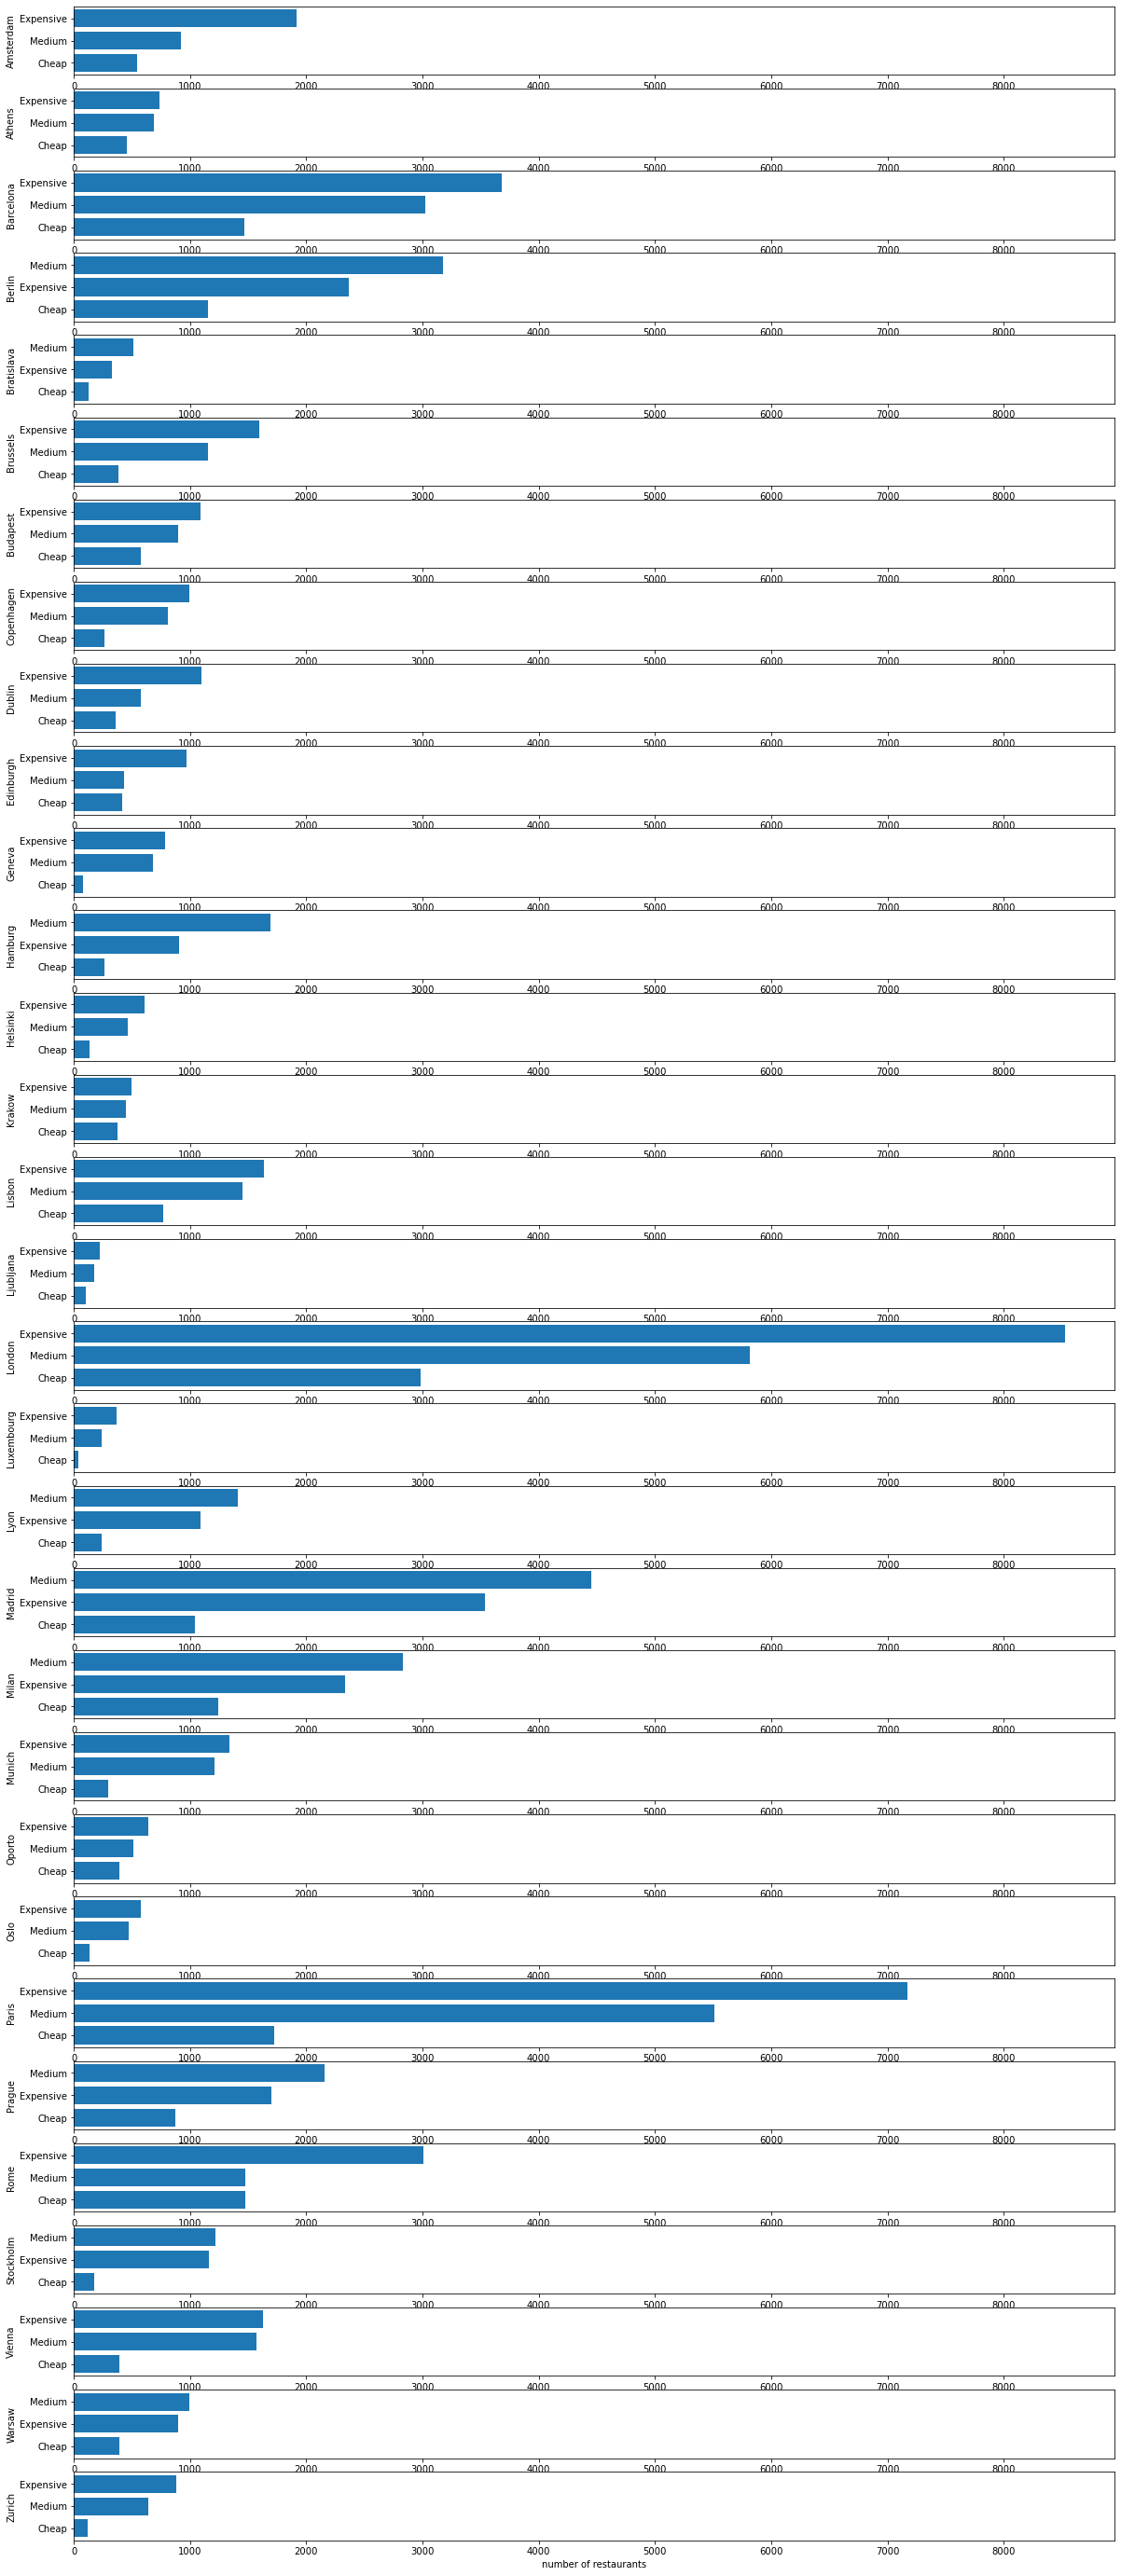

In [49]:
df = restaurants_reviews_1st_df
y1 = 'city'
y2 = 'price_range'
y1_list = cities_list
z = 'restaurant_name'
z_aggregation = 'count'
title = ''
fig_size_value_1 = 20
fig_size_value_2 = 50

hbarplot_multiple_subplots(df,y1,y2,y1_list, z,z_aggregation,title,fig_size_value_1,fig_size_value_2)

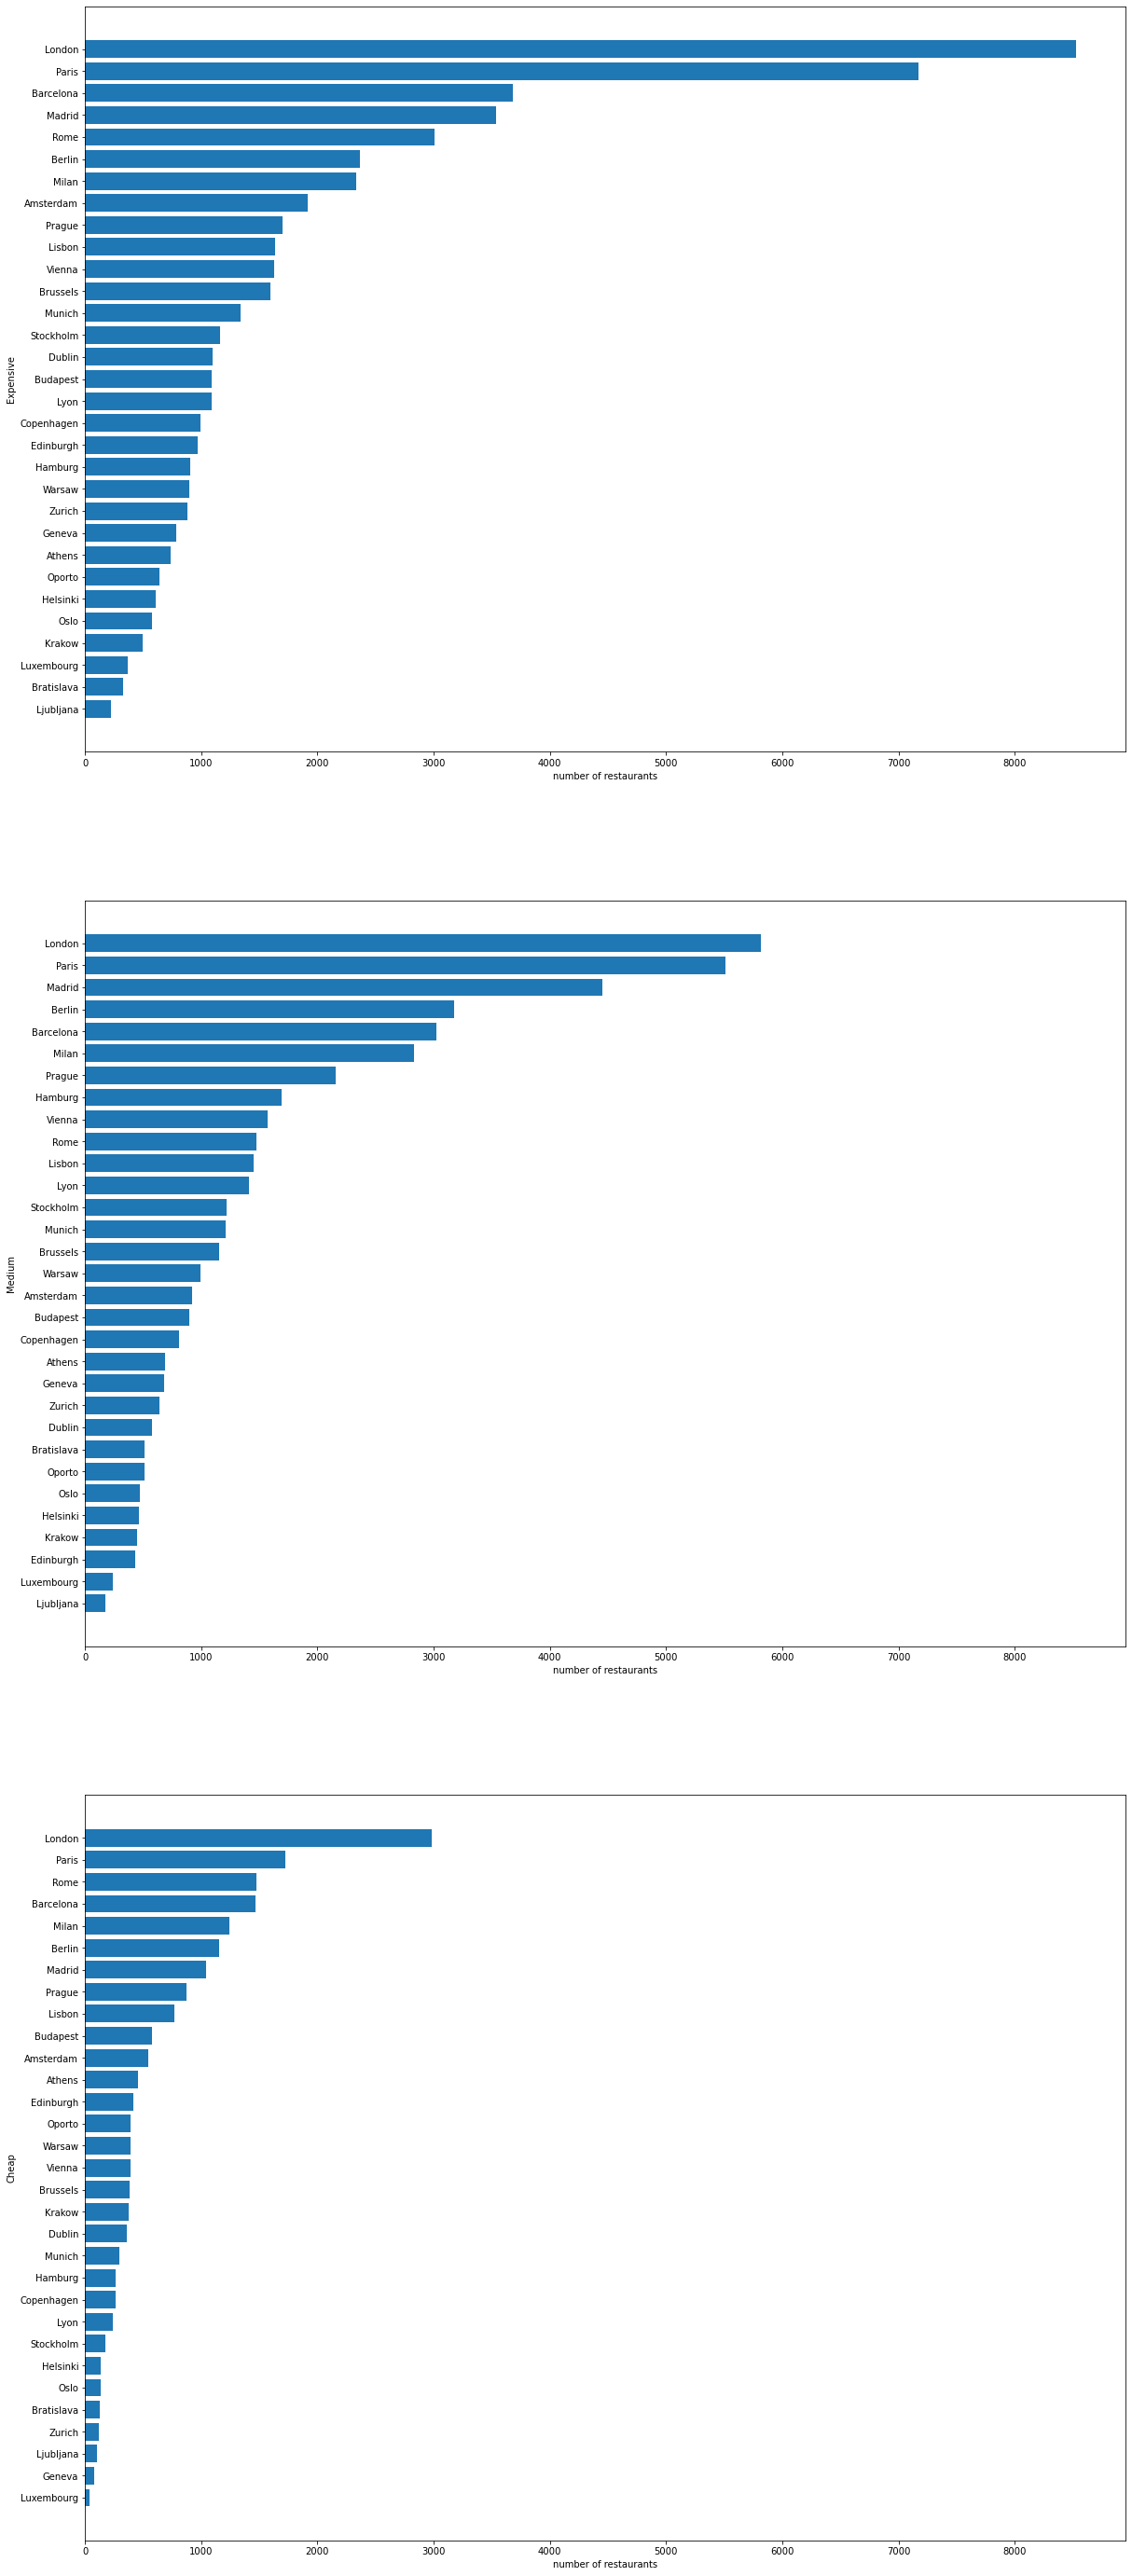

In [50]:
df = restaurants_reviews_1st_df
y1 = 'price_range'
y2 = 'city'
y1_list = price_range_list
z = 'restaurant_name'
z_aggregation = 'count'
title = ''
fig_size_value_1 = 20
fig_size_value_2 = 50

hbarplot_multiple_subplots(df,y1,y2,y1_list, z,z_aggregation,title,fig_size_value_1,fig_size_value_2)

<a id='rating_analysis'></a>
## 6.3.2 _Analysis of the rating_

__What can the below plots showing the distribution of the mean `rating` per `city` and `price_range` tell us?__

We can see that generally cheap restaurants have a better mean rating than the other 2 price ranges.

The global mean rating is 3.98. 

In [86]:
global_mean_rating_across_price_ranges = restaurants_reviews_1st_df.\
agg({'rating' : ['mean','median']})
print('the global mean rating regardless of the price range is : {} '\
      .format(global_mean_rating_across_price_ranges))

the global mean rating regardless of the price range is :           rating
mean    3.987443
median  4.000000 


In [85]:
global_mean_rating_per_price_ranges = restaurants_reviews_1st_df.groupby(by = 'price_range').\
        agg({'rating' : ['mean','median']})
print('the global mean rating per price range is : {} '\
      .format(global_mean_rating_per_price_ranges))

the global mean rating per price range is :                rating       
                 mean median
price_range                 
Cheap        4.093596    4.0
Expensive    3.984428    4.0
Medium       3.948536    4.0 


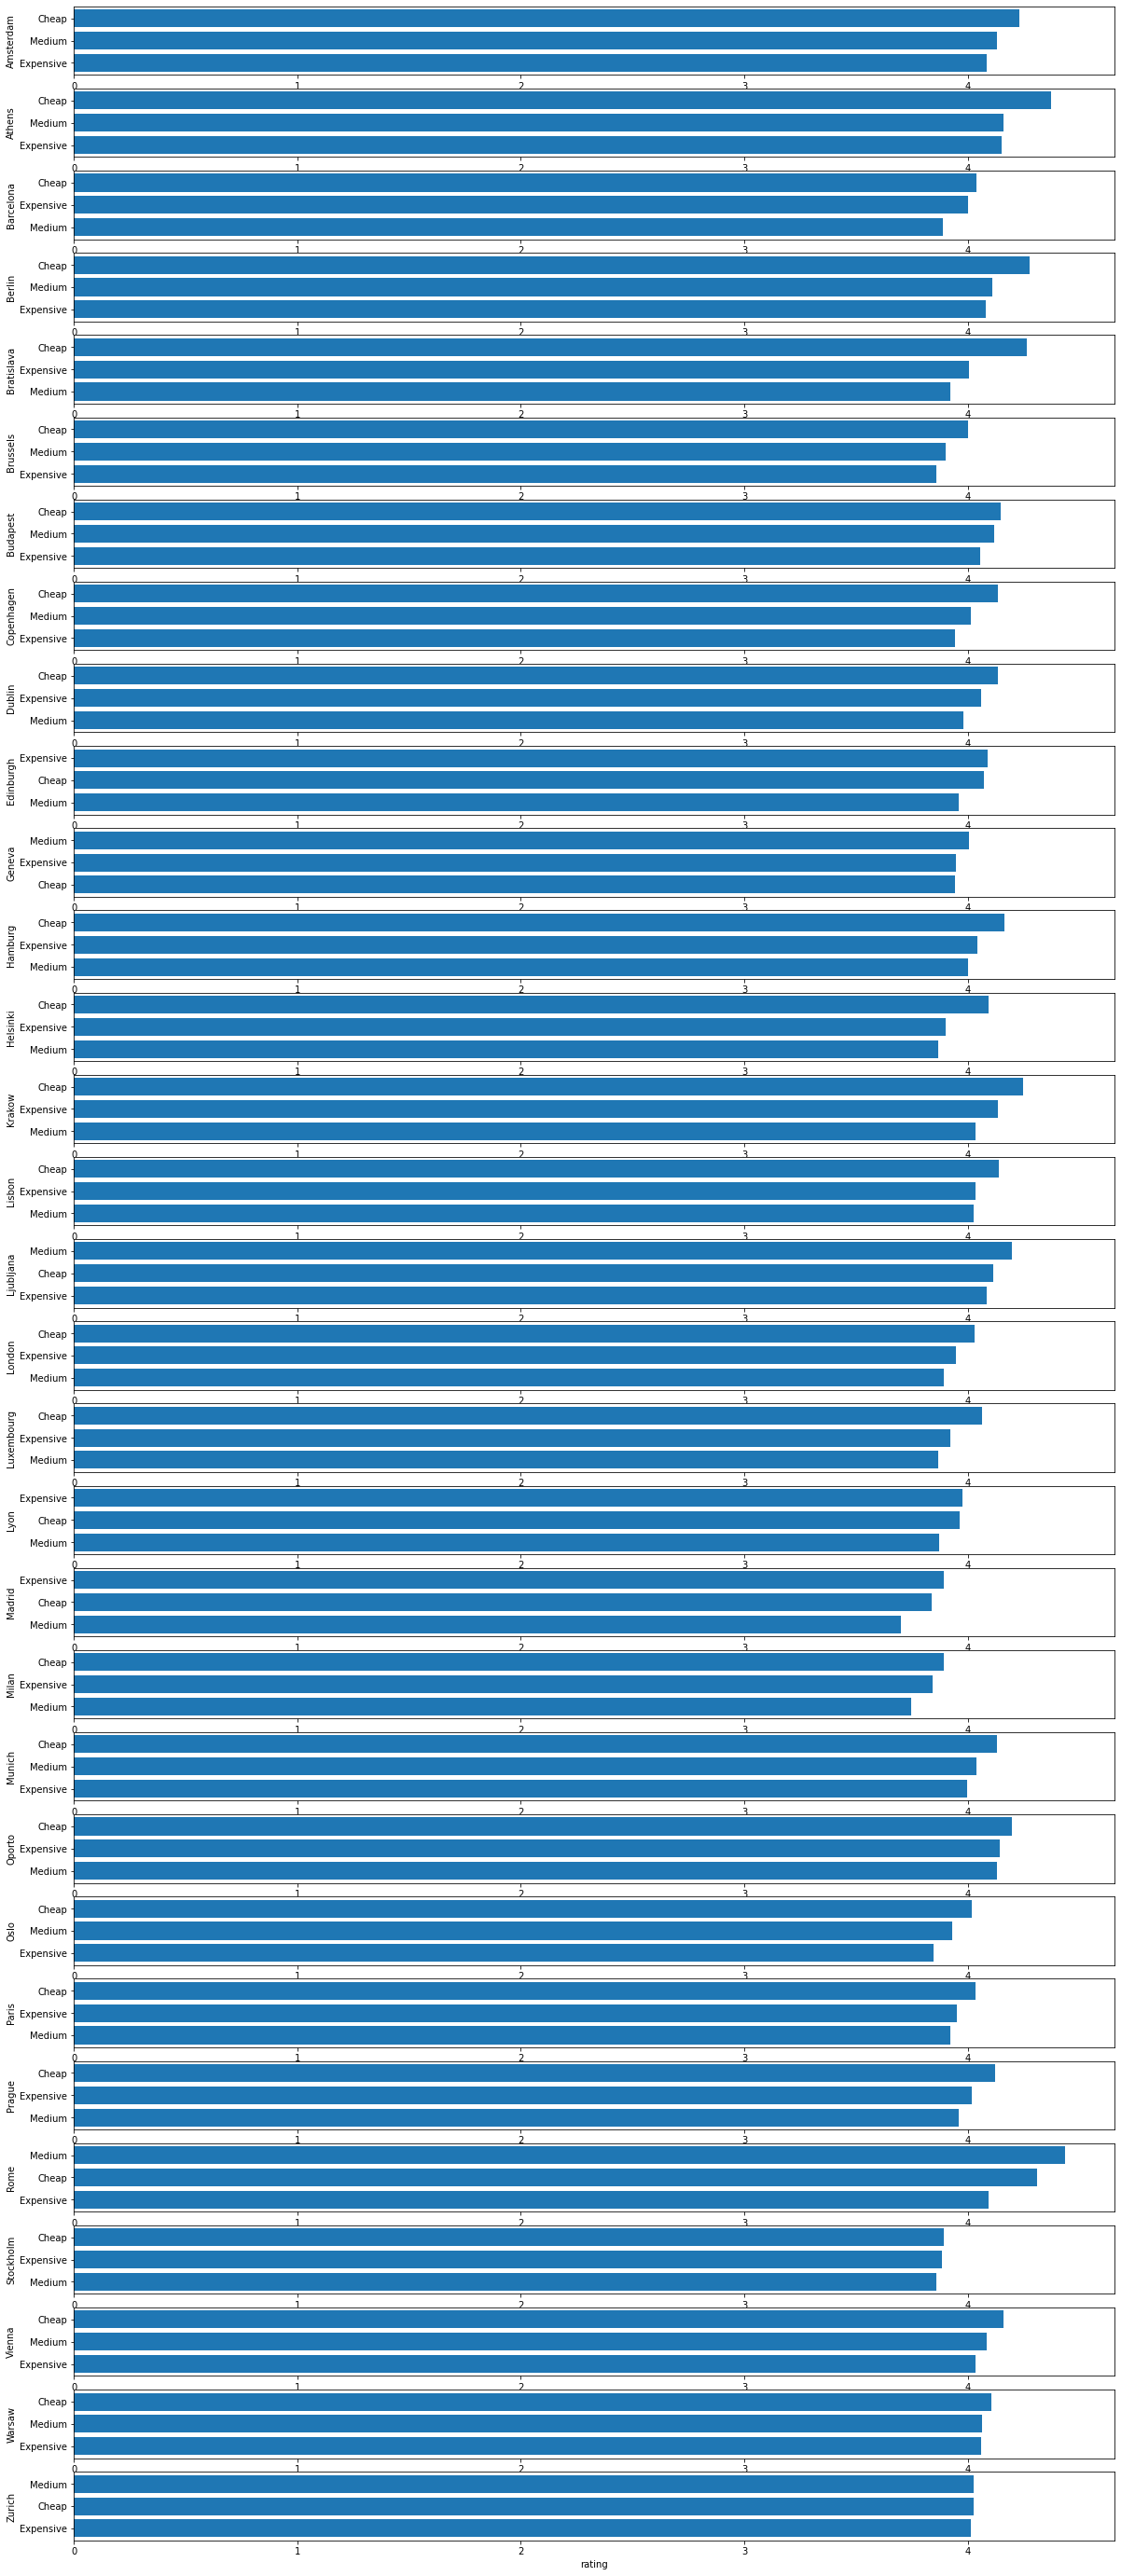

In [51]:
df = restaurants_reviews_1st_df
y1 = 'city'
y2 = 'price_range'
y1_list = cities_list
z = 'rating'
z_aggregation = 'mean'
title = ''
fig_size_value_1 = 20
fig_size_value_2 = 50

hbarplot_multiple_subplots(df,y1,y2,y1_list, z,z_aggregation,title,fig_size_value_1,fig_size_value_2)

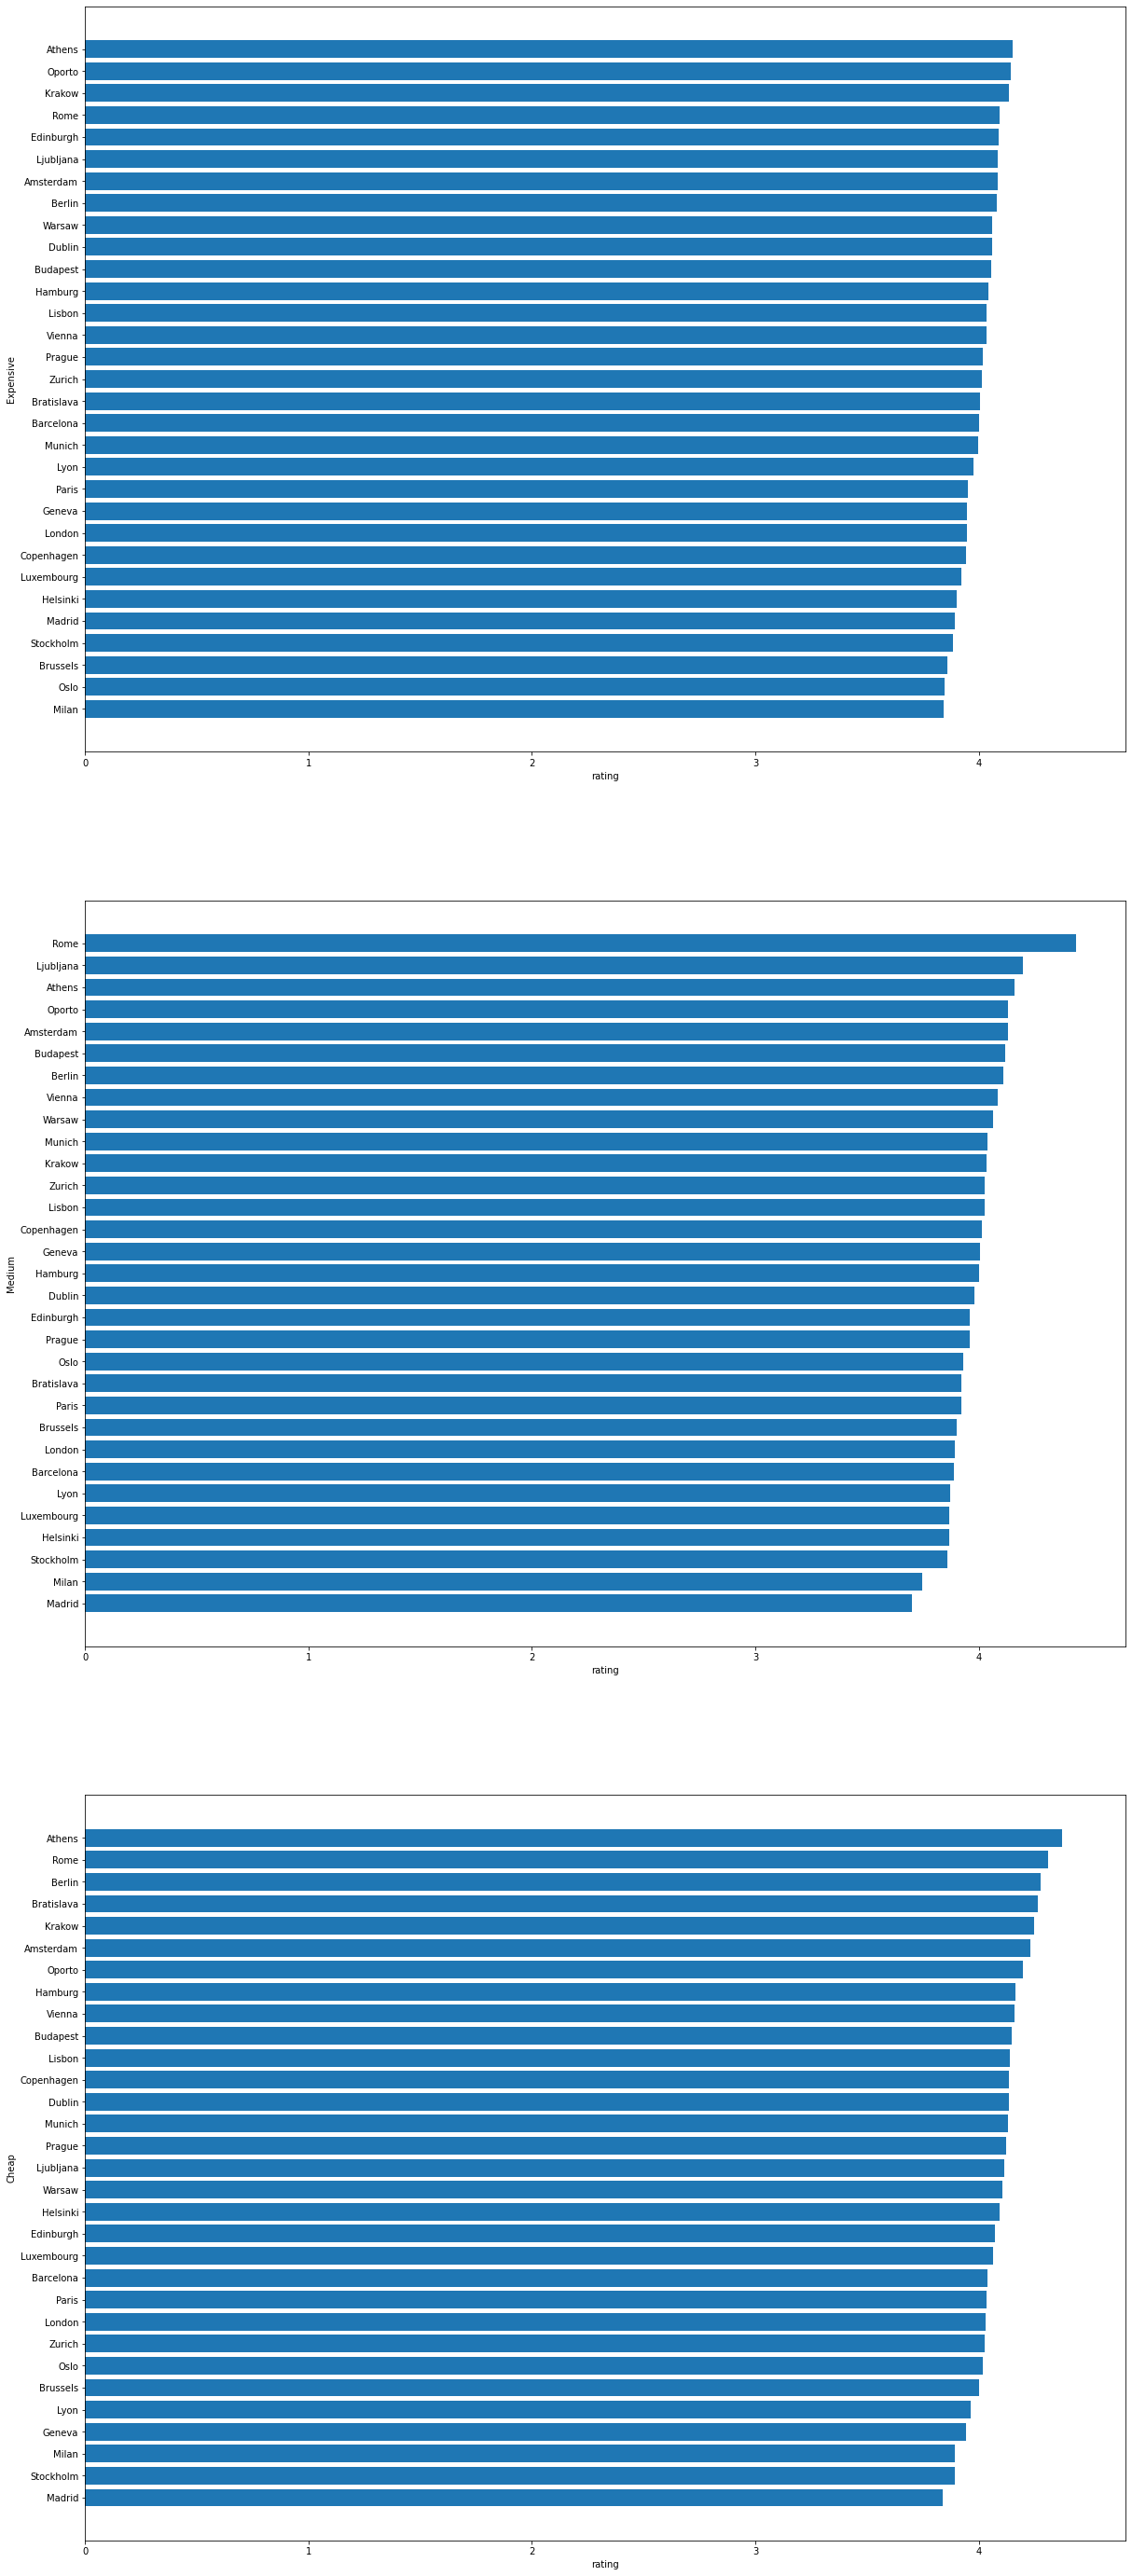

In [52]:
df = restaurants_reviews_1st_df
y1 = 'price_range'
y2 = 'city'
y1_list = price_range_list
z = 'rating'
z_aggregation = 'mean'
title = ''
fig_size_value_1 = 20
fig_size_value_2 = 50

hbarplot_multiple_subplots(df,y1,y2,y1_list, z,z_aggregation,title,fig_size_value_1,fig_size_value_2)

### 

__What can the below boxplots of the rating per city and cuisine style tell us about the distribution?__

- The median rating is : 4.
- There are several categories :
    - __category 1__ : some price ranges have their IQR (Interquartile range) starting from rating 4 and among them, we have sub-categories:
         - the 25th percentile and median are overlapped (meaning that 50% of the data points are already at rating 4); ex : Amsterdam/expensive price range.
         - the median is above 4 and the 75th percentile is at 4.5; ex : Athens/ Medium price range.
         - the median is at 4.5 rating and the 75th percentile is overlapping with the max value. Rome is the only one in this case, but in the unknown price range.     

    - __category 2__ : the 25th percentile is at 3.5, the median at 4 and the 75th percentile at 4.5; ex : Madrid/ Expensive price range.
    - __category 3__ : the 25th percentile is overlapping with the median at rating 3.5 and the 75th percentile is at 4; ex : Brussels/ Expensive price range.
    - __category 4__ : the 25th percentile is below 3.5; Madrid/Medium price rance is the only one in this category.

Category 1 is the most prevalent, followed by category 2.

From the plot, we can see Rome and Madrid are standing out in opposite directions!

Cities like Amsterdam, Athens, Oporto are enjoying good rating results as we find the category 1 in all price ranges!

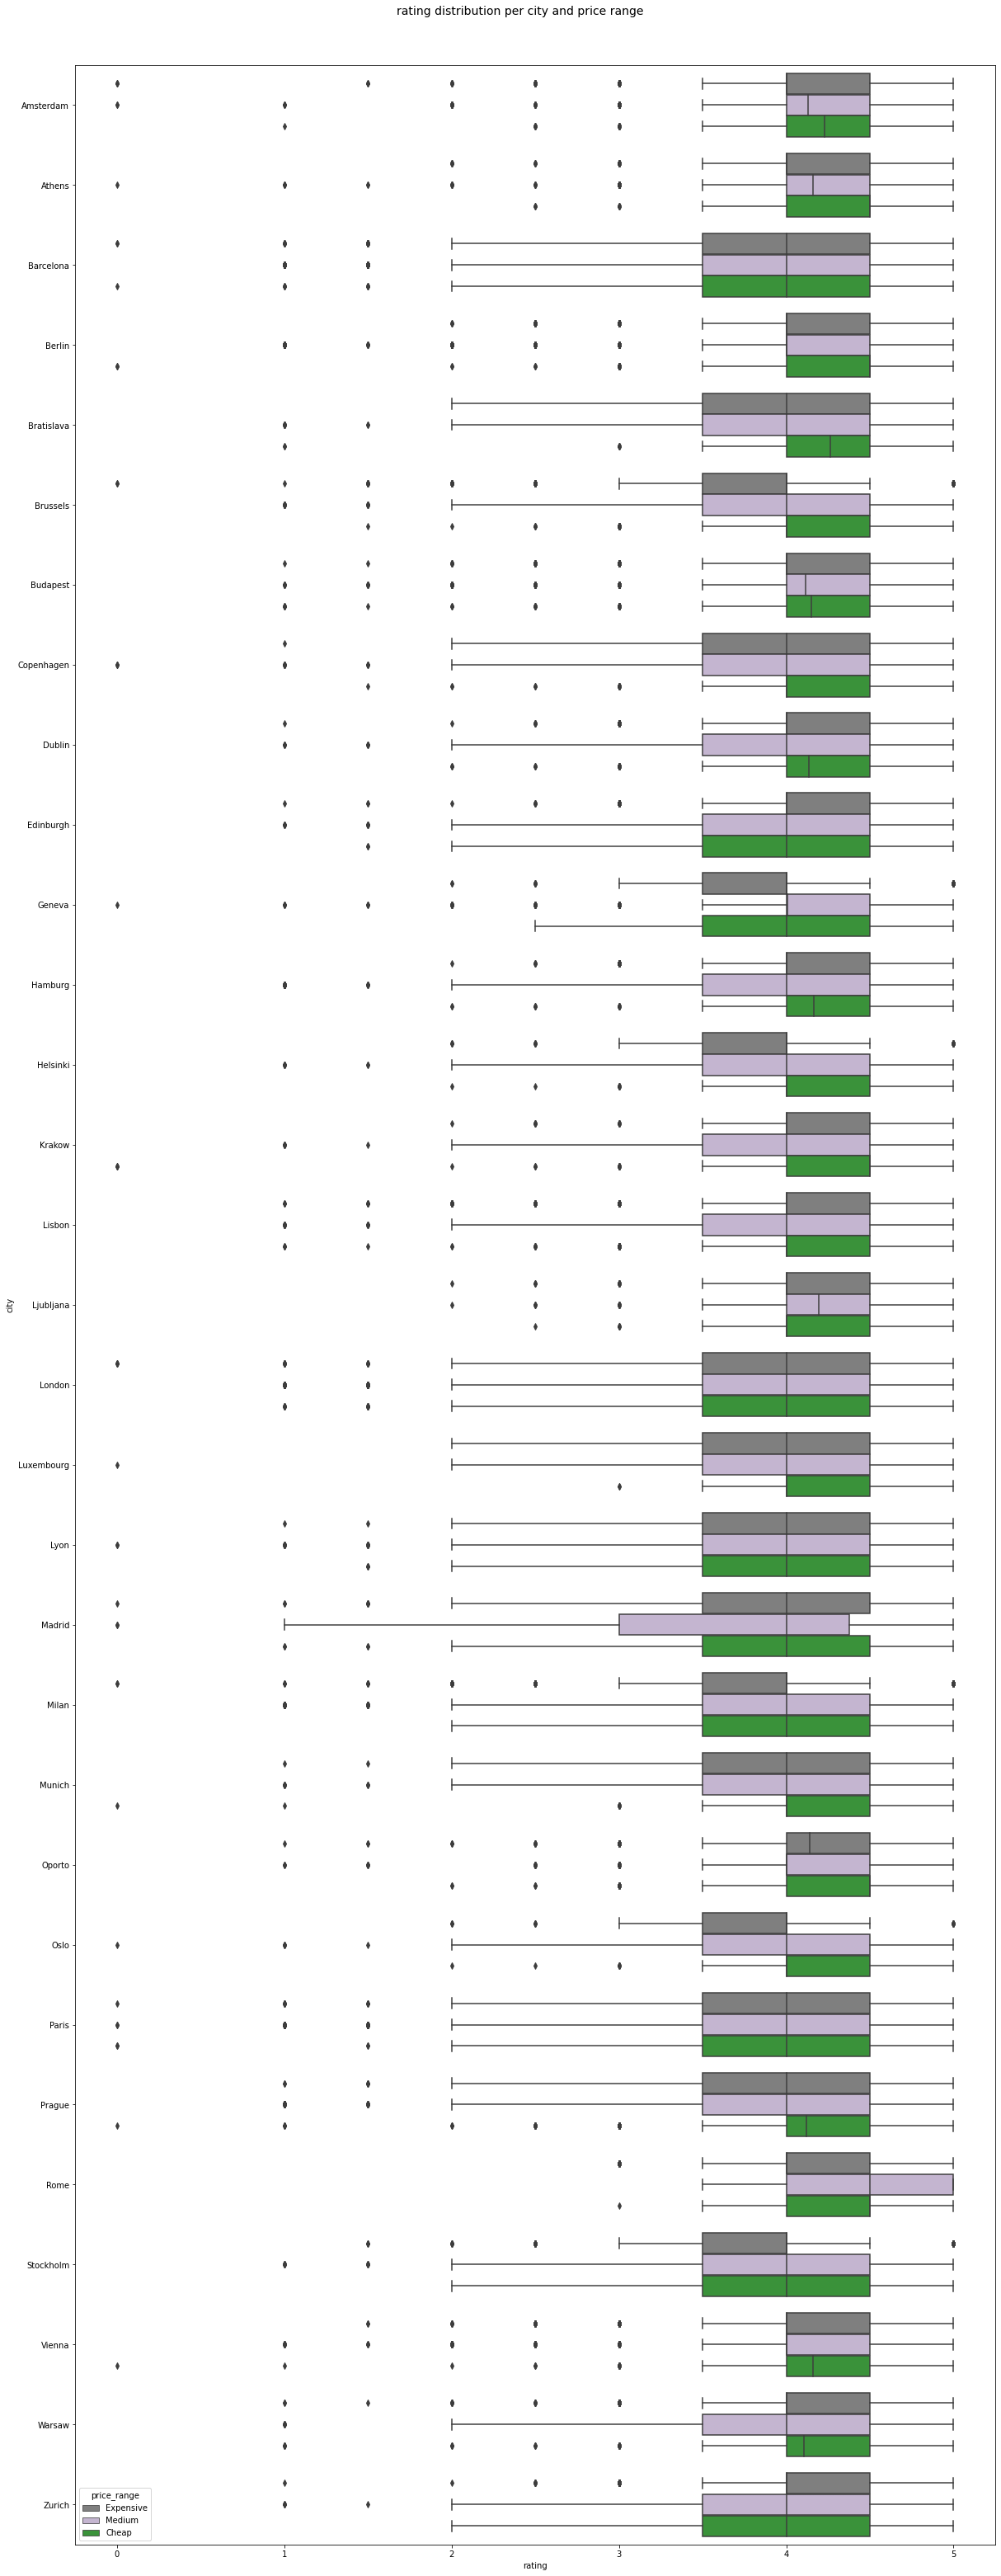

In [53]:
df = restaurants_reviews_1st_df
y = 'city'
hue = 'price_range'
x = 'rating'
title = 'rating distribution per city and price range'
fig_size_value_1 = 20
fig_size_value_2 = 50

boxplot_multiple_subplots(df,x,y,hue,title,fig_size_value_1,fig_size_value_2)

From the boxplot below, we can notice that :
- in the Expensive/Medium price range, there is a balanced distribution between categories 1,2 and 3.
- in the Cheap price range, all cities have surprisingly the category 1!!

>__This means that you don't have to go to Expensive price range restaurants to find the best ratings!__

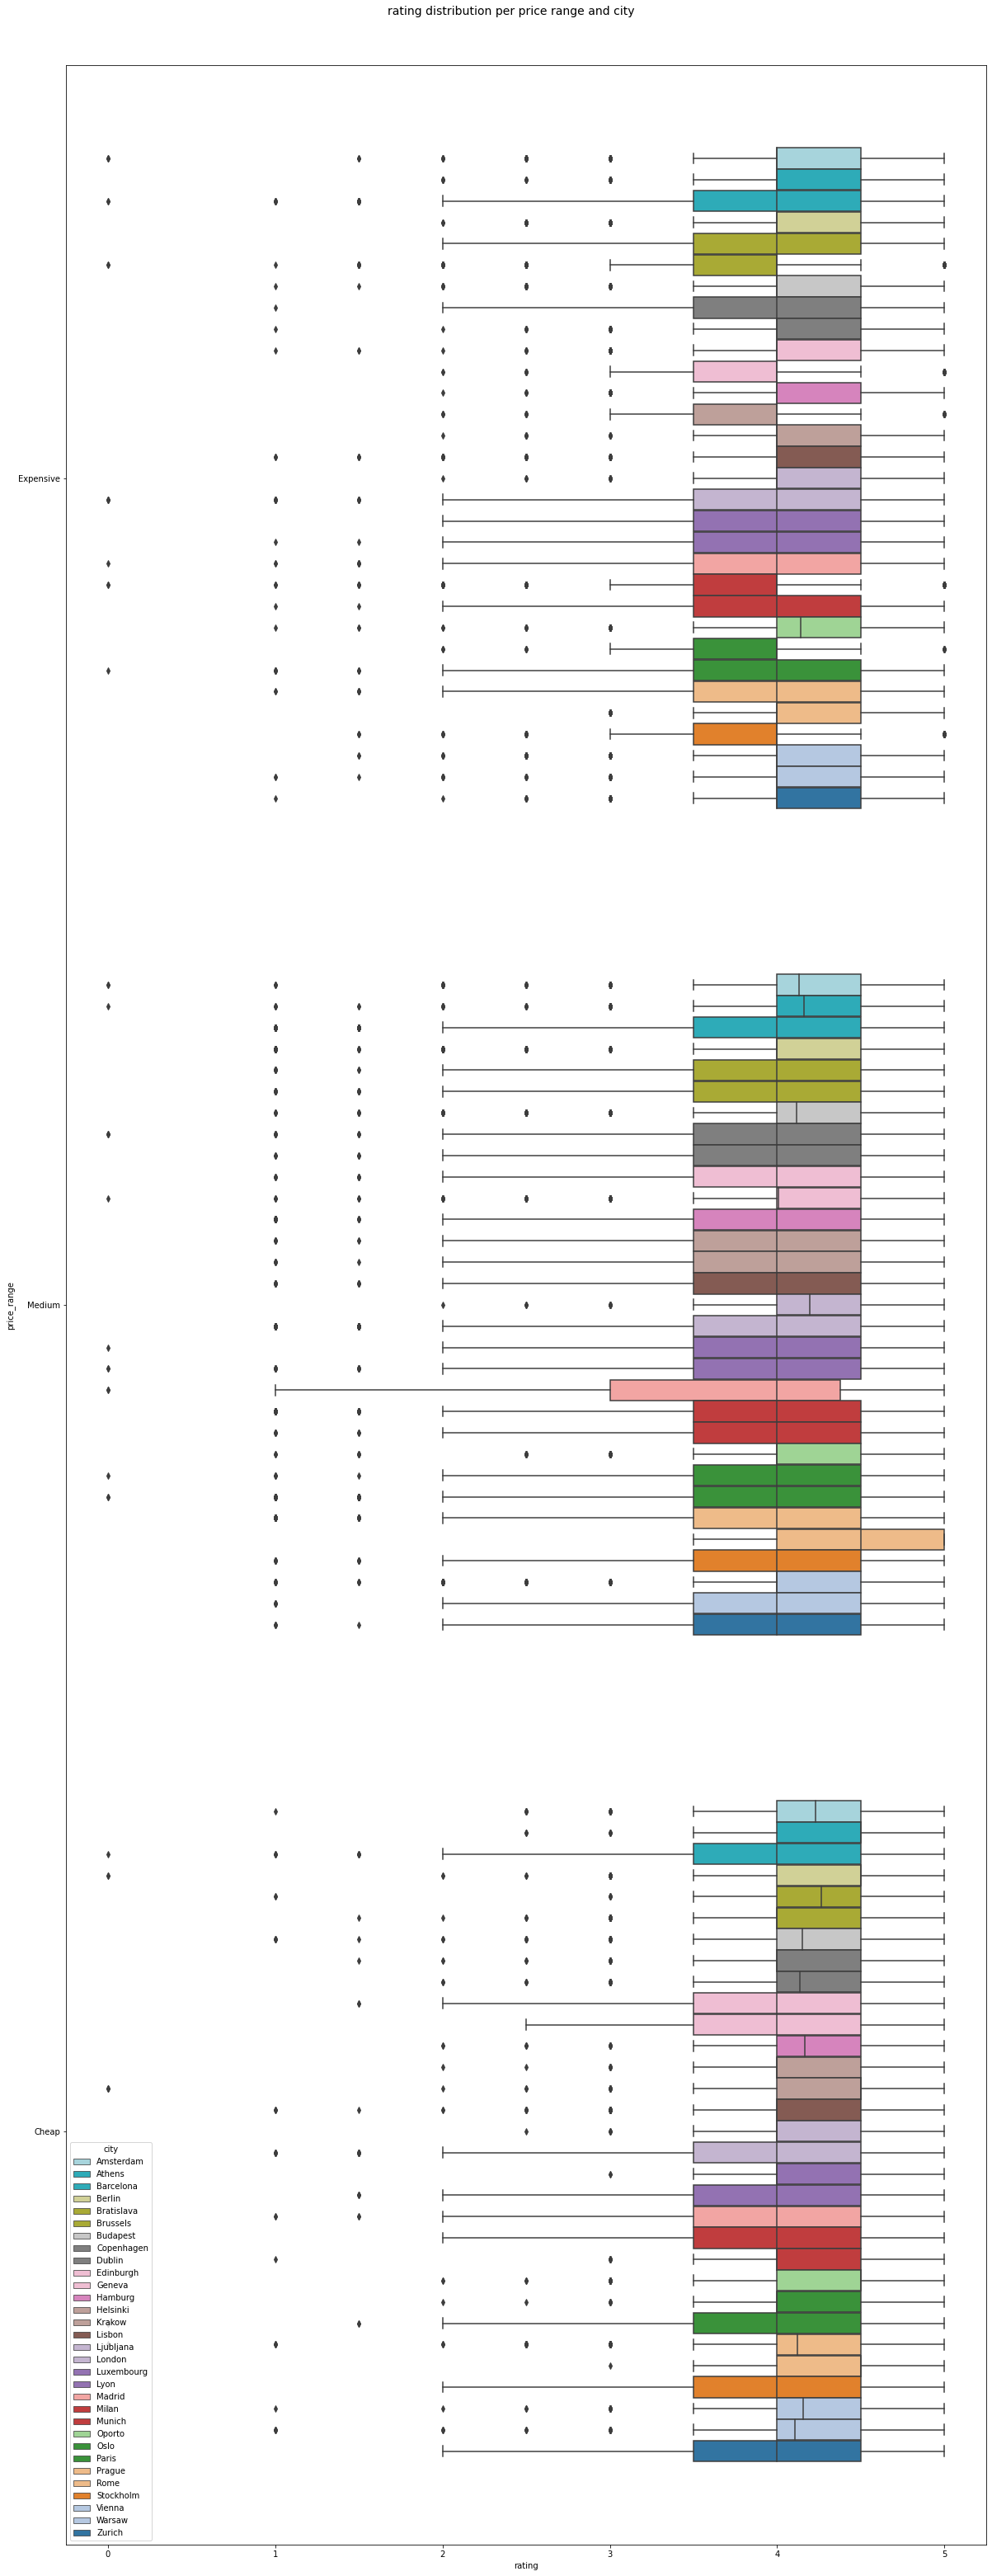

In [54]:
df = restaurants_reviews_1st_df
y = 'price_range'
hue = 'city' 
x = 'rating'
title = 'rating distribution per price range and city'
fig_size_value_1 = 20
fig_size_value_2 = 50

boxplot_multiple_subplots(df,x,y,hue,title,fig_size_value_1,fig_size_value_2)

<a id='number_of_reviews_analysis'></a>
## 6.3.3 _Analysis of the Number of reviews_

We will use the below histograms to plot the number of reviews.

We can observe a downward slope from number of reviews 4 to 20. And then a "normal distribution" curve.

However, when we run the graph per price range, we can see the curve is accounted for by price ranges Expensive and Cheap, while the downward slope is explained by the Medium price range. 

> __We can say that the number of reviews is normally distributed for the expensive and cheap price ranges!__

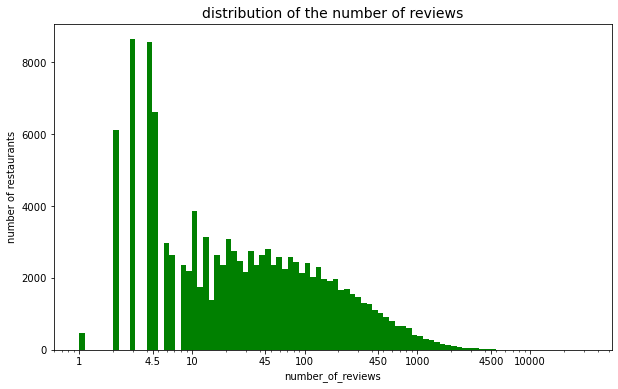

In [55]:

df = restaurants_reviews_1st_df
x = 'number_of_reviews'
city ='Global'
title = 'distribution of the number of reviews'
ylabel = 'number of restaurants'
histogram (df,x, city, title,ylabel)

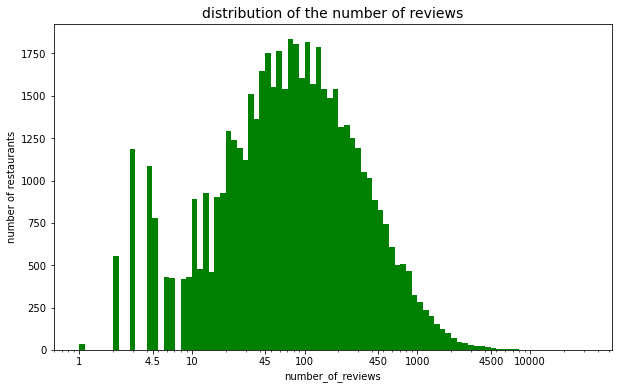

In [56]:
df = restaurants_reviews_1st_df[(restaurants_reviews_1st_df.price_range == 'Expensive')]
x = 'number_of_reviews'
city ='Global'
title = 'distribution of the number of reviews'
ylabel = 'number of restaurants'
histogram (df,x, city, title,ylabel)

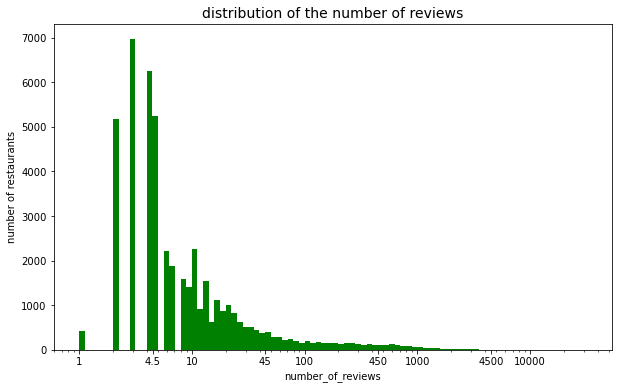

In [57]:
df = restaurants_reviews_1st_df[restaurants_reviews_1st_df.price_range == 'Medium']
x = 'number_of_reviews'
city ='Global'
title = 'distribution of the number of reviews'
ylabel = 'number of restaurants'
histogram (df,x, city, title,ylabel)

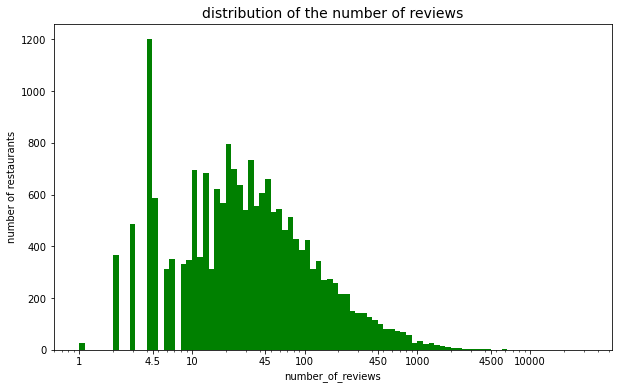

In [58]:
df = restaurants_reviews_1st_df[restaurants_reviews_1st_df.price_range == 'Cheap']
x = 'number_of_reviews'
city ='Global'
title = 'distribution of the number of reviews'
ylabel = 'number of restaurants'
histogram (df,x, city, title,ylabel)

__What can the below boxplots can tell us about the distribution of the number of reviews per city and price range?__

> __As we can see in the plots below, the most discussed restaurants are in the Expensive price range. Then comes the Cheap range , followed by the Medium range.__

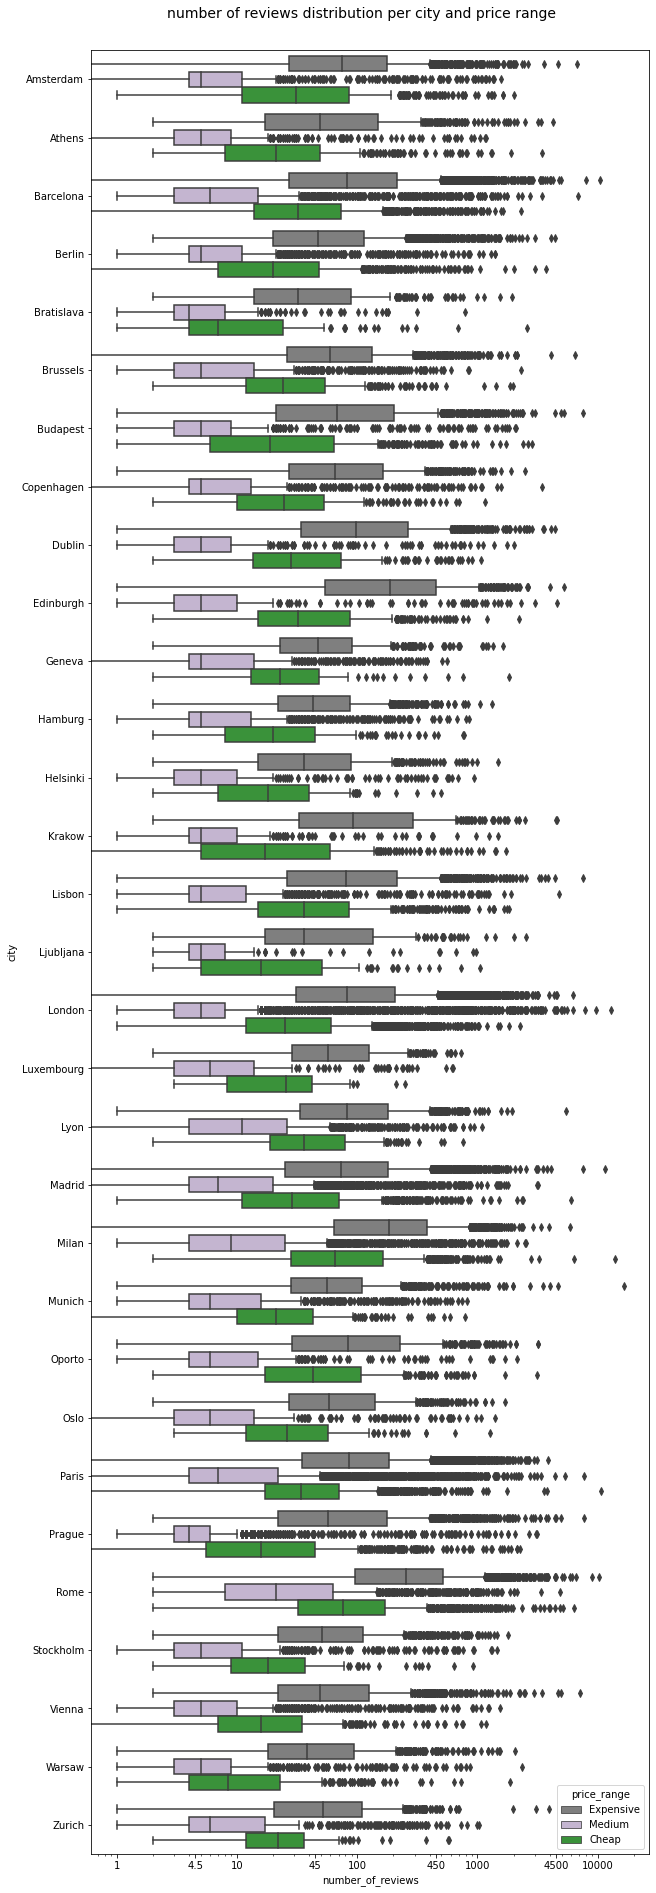

In [60]:
df = restaurants_reviews_1st_df
y = 'city'
hue = 'price_range'
x = 'number_of_reviews'
title = 'number of reviews distribution per city and price range'
fig_size_value_1 = 10
fig_size_value_2 = 30

boxplot_multiple_subplots(df,x,y,hue,title,fig_size_value_1,fig_size_value_2)

From the below boxplot, we can notice that :
- in the Expensive price range, Edinburgh, Rome and Milan have the best scores.
- in the Medium range, Rome is leading.
- in the Cheap range, Milan and Rome are leading.
    
> __The figures would mean the travellers are very willing to eat out in expensive restaurants that are talked about very much in some cities. The number of reviews is indeed an indicator of the frequentation of customers.__

If we consider Rome's score, it attracts more customers in the Expensive ranges. 
From what we have seen about Rome's rating score, and considering the rating as an indicator of customer satisfaction, we could safely say that they have an international reputation of quality.

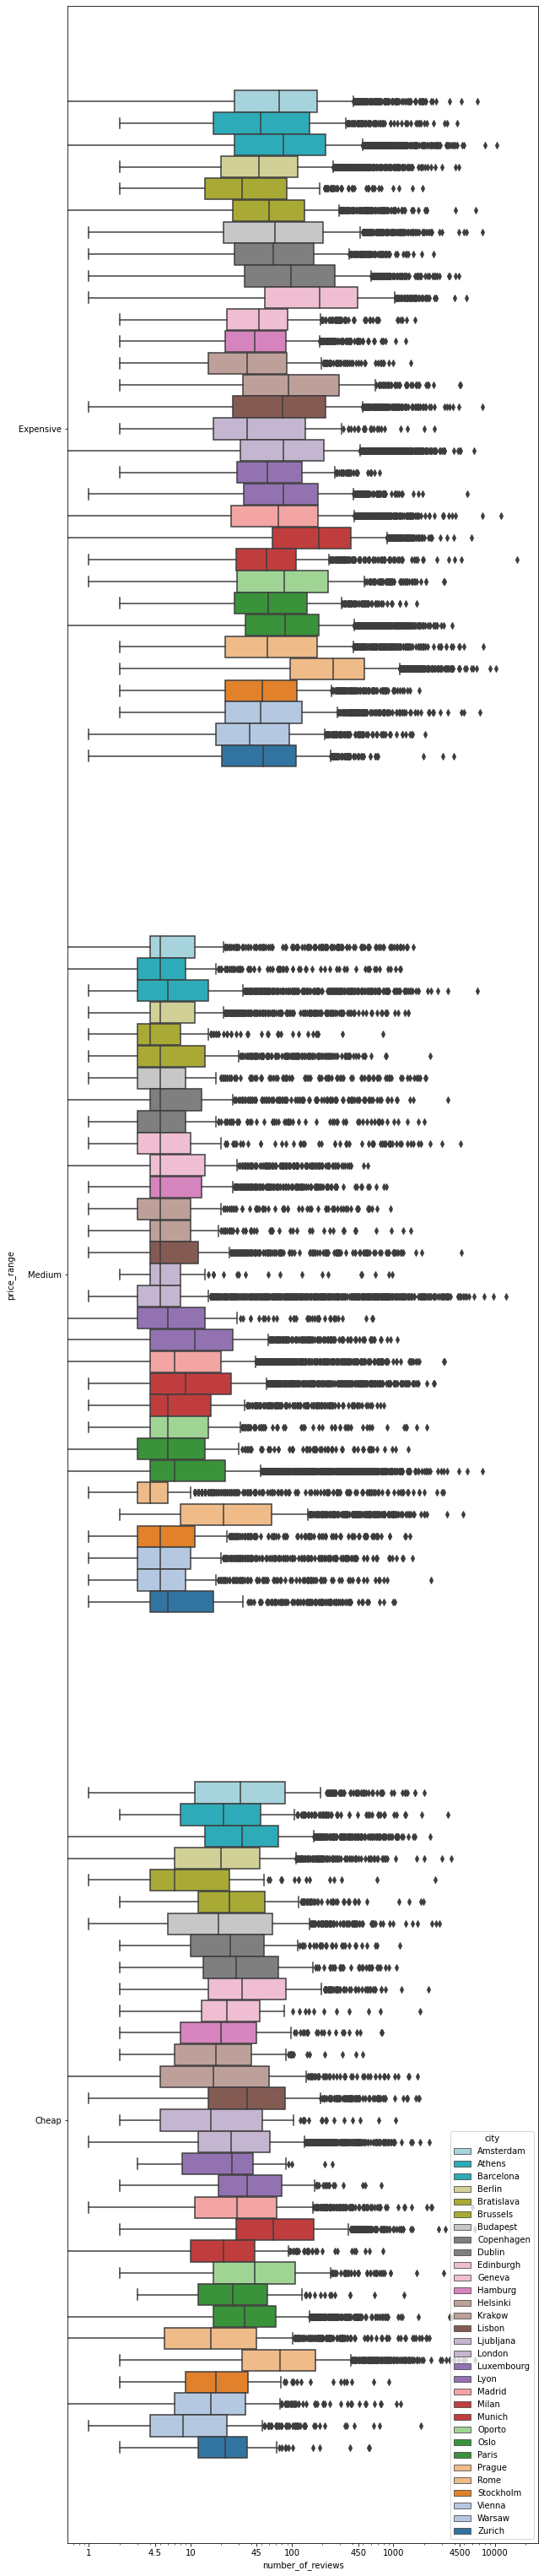

In [61]:
df = restaurants_reviews_1st_df
y = 'price_range' 
hue = 'city'
x = 'number_of_reviews'
title = ''
fig_size_value_1 = 10
fig_size_value_2 = 50

boxplot_multiple_subplots(df,x,y,hue,title,fig_size_value_1,fig_size_value_2)

Let' have a look at the mean number of reviews by city and price range.
- Expensive price range:
    The mean is aligned with what what we concluded from the previous boxplots.
    Rome, Edinburgh and Milan have the best scores.
- Medium price range :
    Rome and Edinburgh are leading.
- Cheap price range :
    Rome Milan and Oporto are leading.


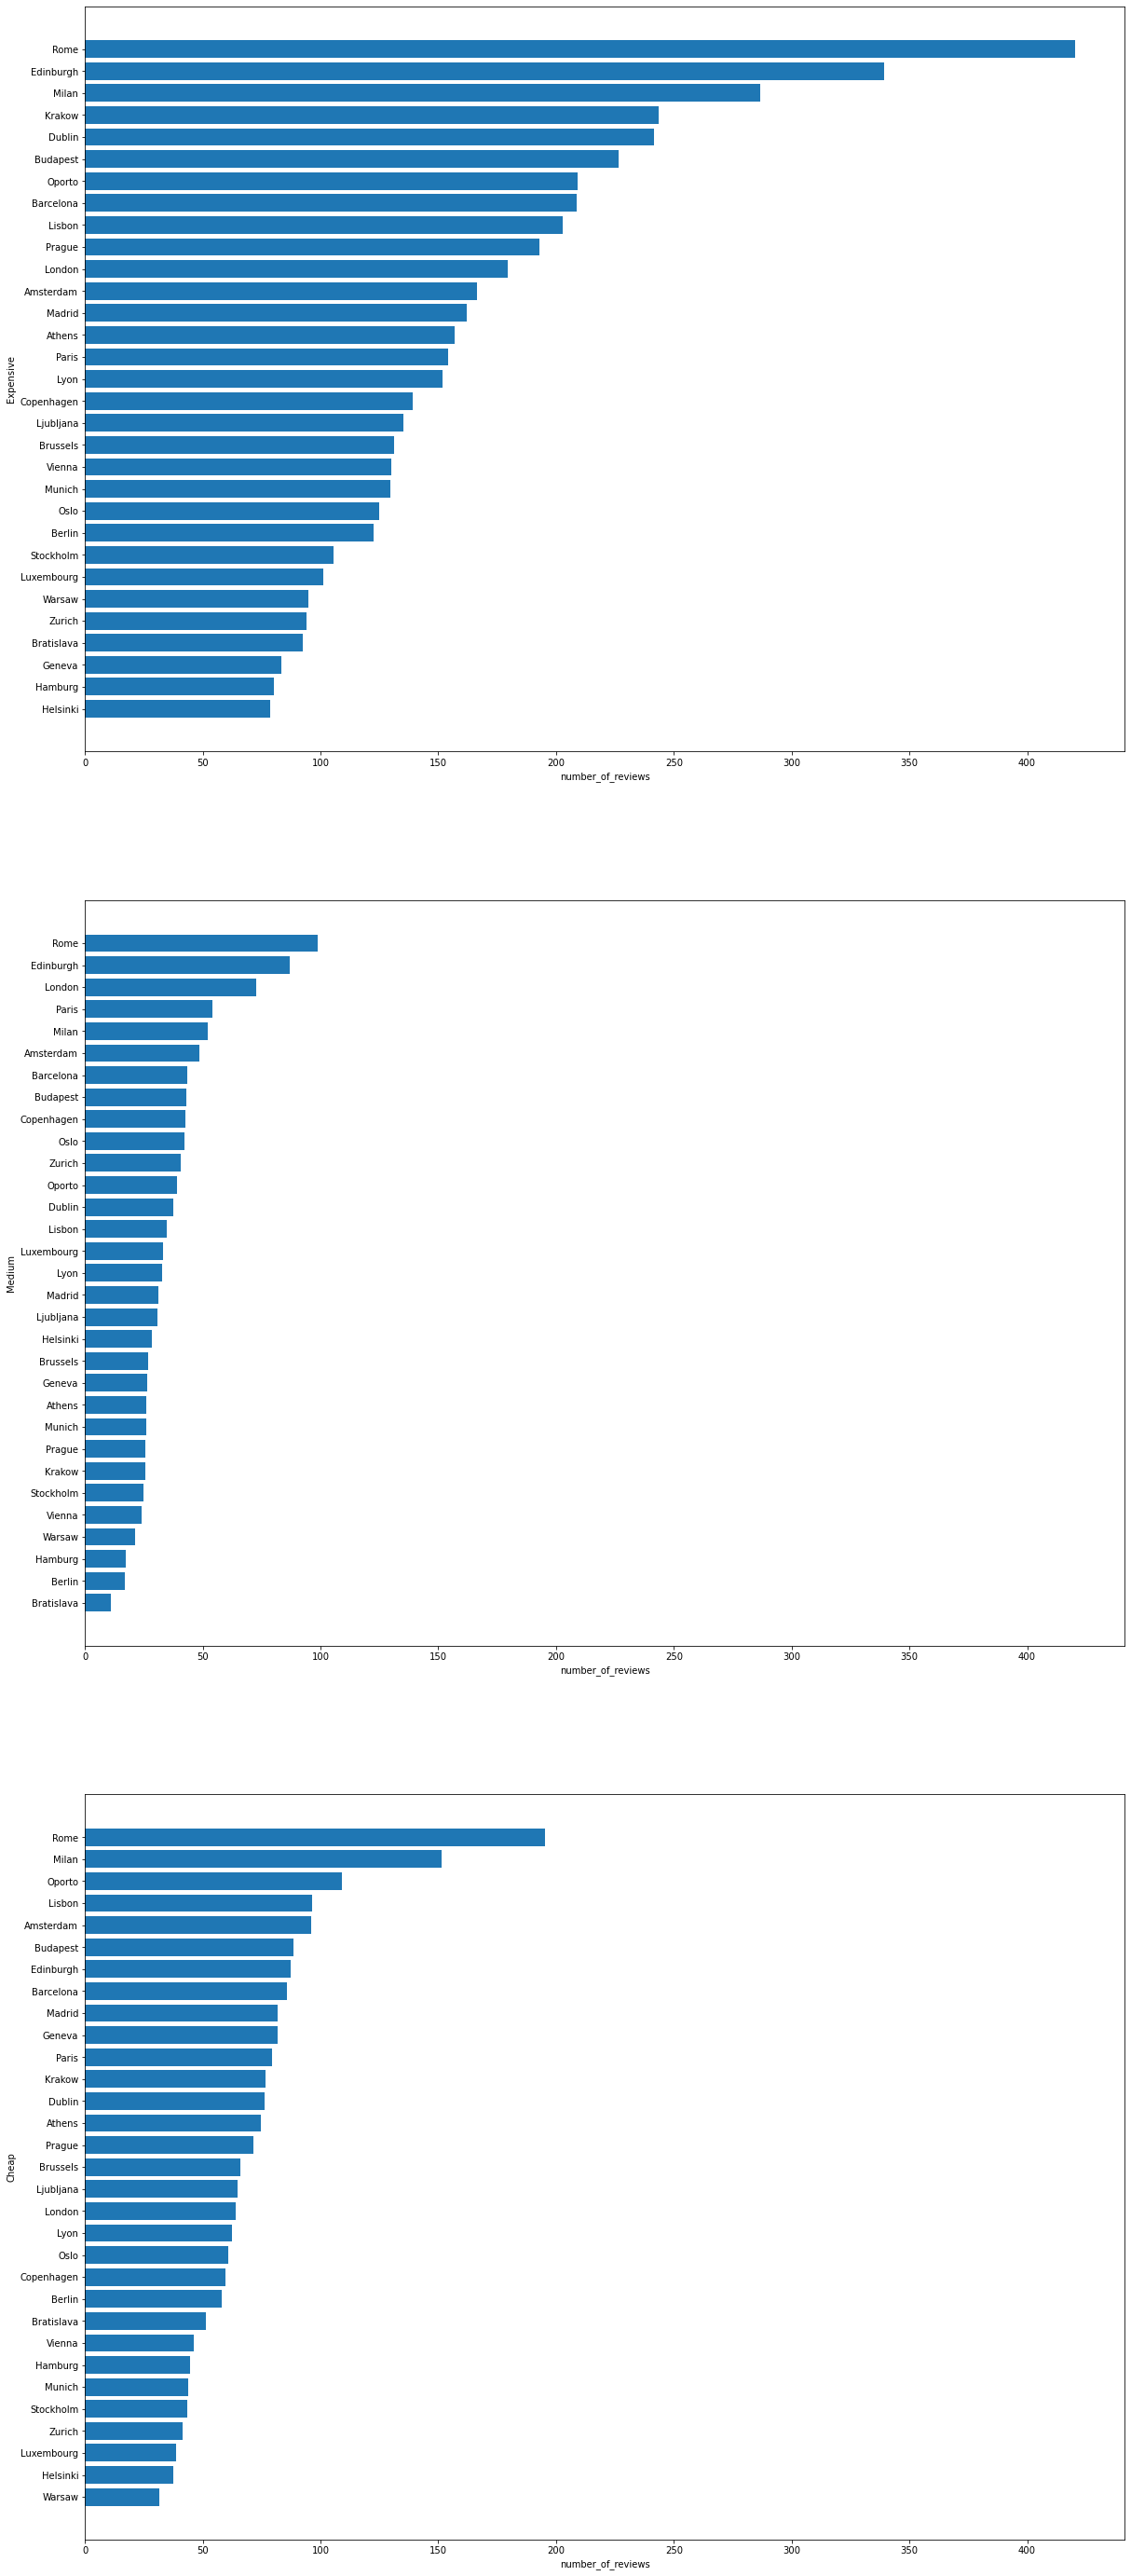

In [62]:
df = restaurants_reviews_1st_df
y1 = 'price_range'
y2 = 'city'
y1_list = price_range_list
z = 'number_of_reviews'
z_aggregation = 'mean'
title = ''
fig_size_value_1 = 20
fig_size_value_2 = 50

hbarplot_multiple_subplots(df,y1,y2,y1_list, z,z_aggregation,title,fig_size_value_1,fig_size_value_2)

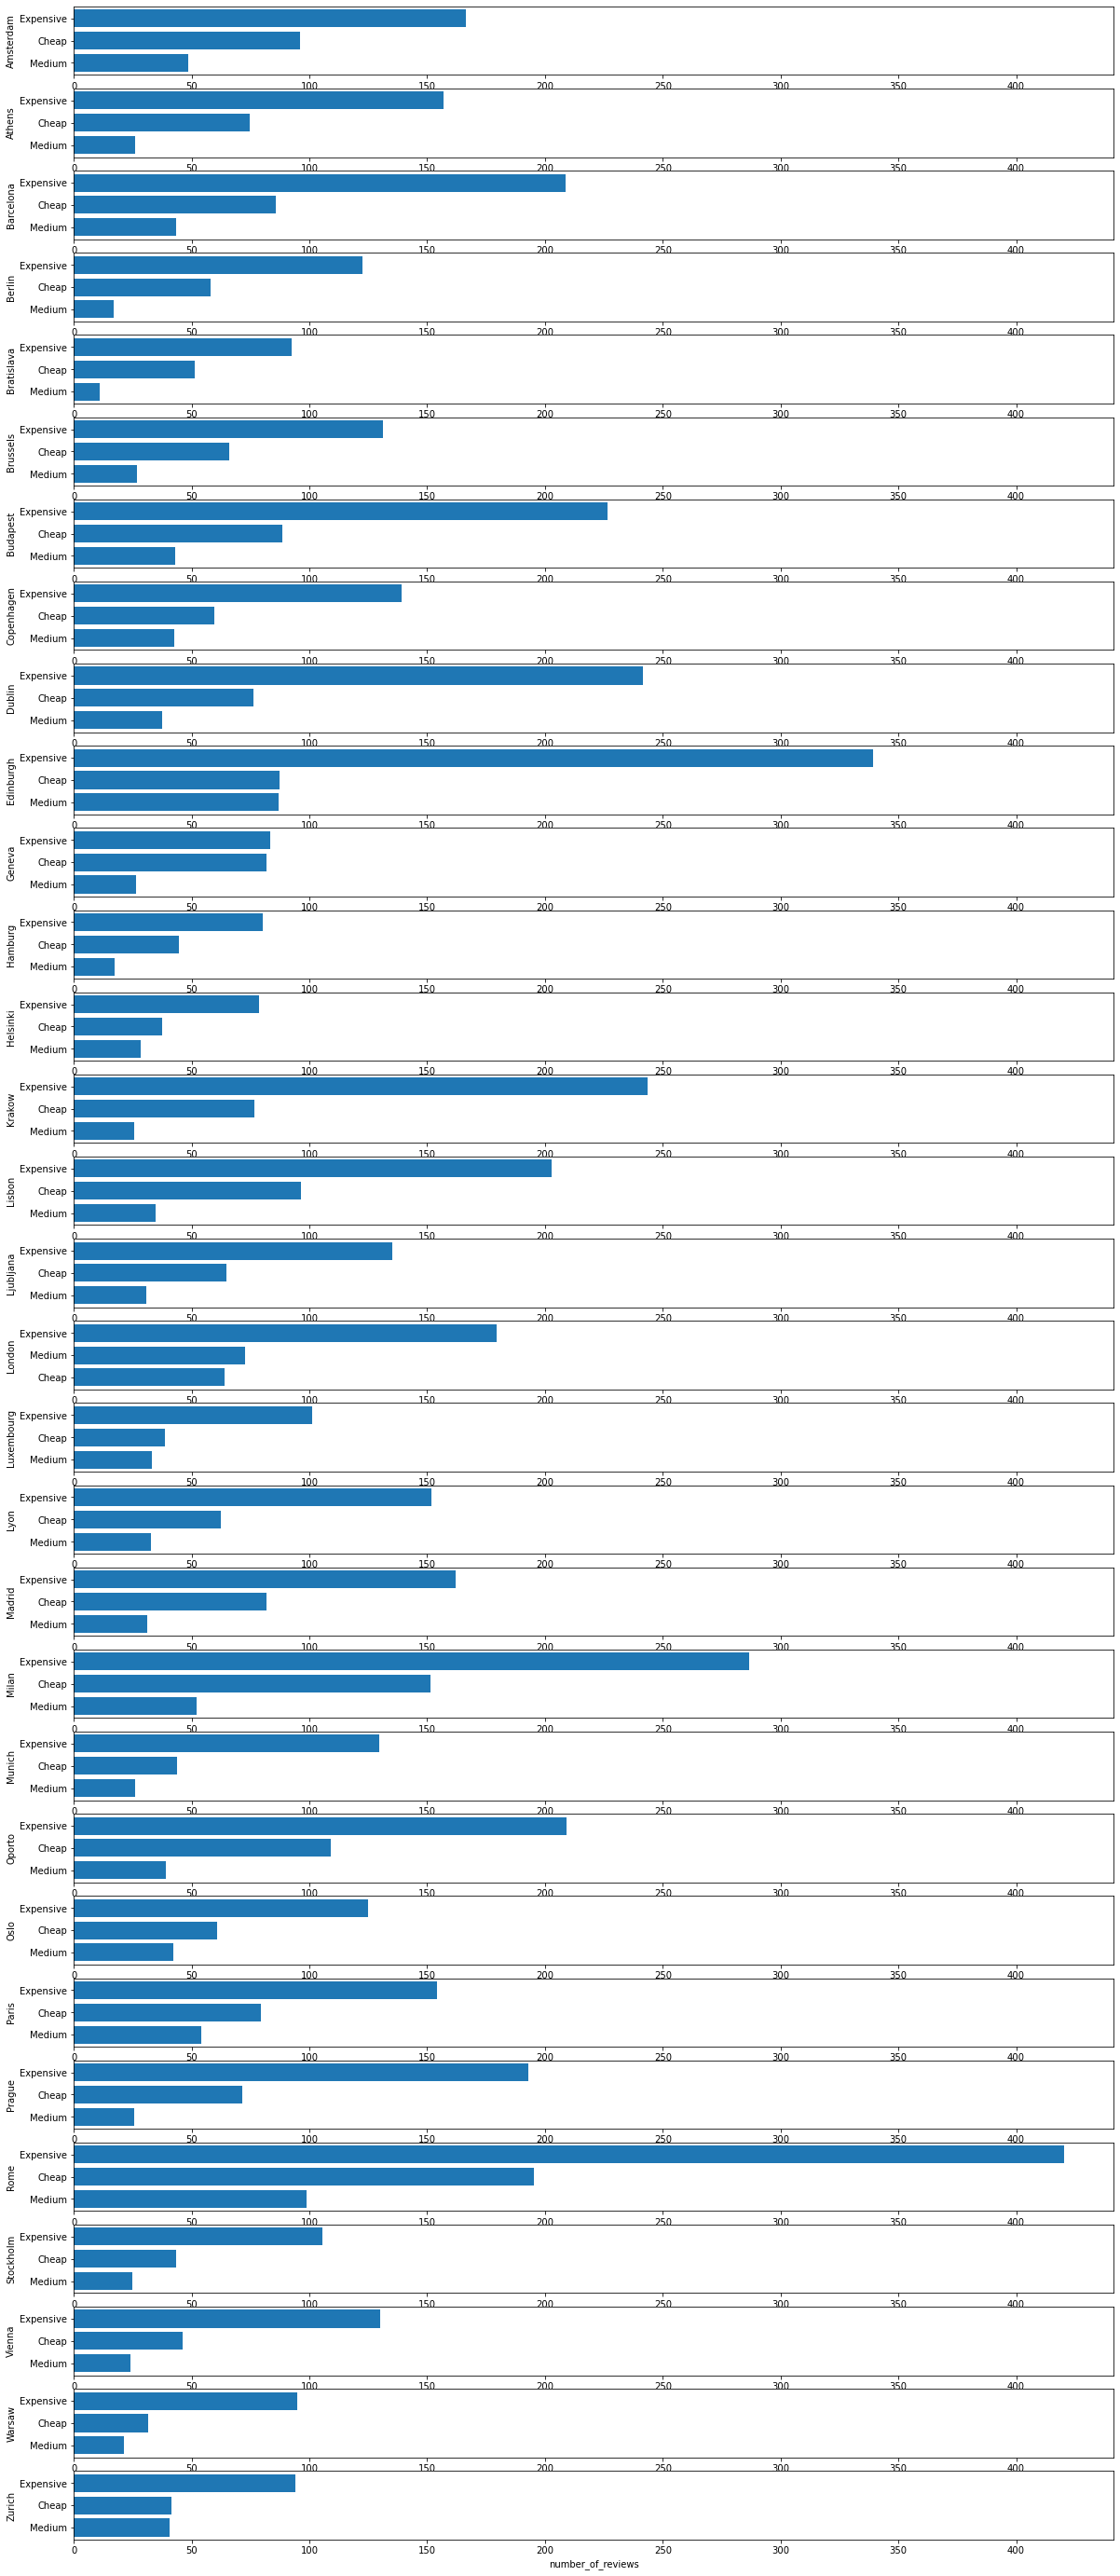

In [63]:
df = restaurants_reviews_1st_df
y1 = 'city'
y2 = 'price_range'
y1_list = cities_list
z = 'number_of_reviews'
z_aggregation = 'mean'
title = ''
fig_size_value_1 = 20
fig_size_value_2 = 50

hbarplot_multiple_subplots(df,y1,y2,y1_list, z,z_aggregation,title,fig_size_value_1,fig_size_value_2)

<a id='relationship_rating_number_reviews'></a>
## 6.3.4 _Relationship between the number of reviews and rating_

__Is there a relationship between the number of reviews and the rating?__

In the below histogram, we only consider restaurants which are reviewed (by getting the sum of `number_of_reviews` per rating) and can see the most discussed ones have a rating between 3.5 and 4.5.

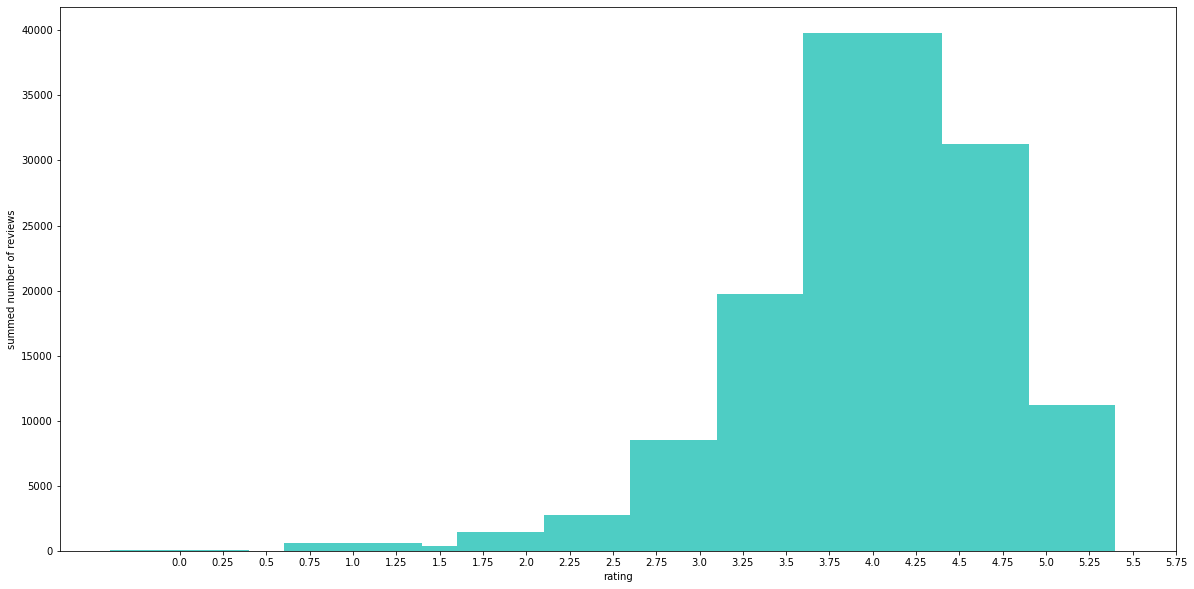

In [64]:
Ser = restaurants_reviews_1st_df.groupby(by = ['rating']).restaurant_name.count().sort_index(ascending = True)
x = 'rating'
ylabel = 'summed number of reviews'
title = 'sum of number of reviews per rating'
fig_size_value_1 = 20
fig_size_value_2 = 10

vbarplot_single_plot(Ser, x, ylabel,title,fig_size_value_1,fig_size_value_2)

From the below regression plot, we could say that the number of reviews increases with the rating..
> __the higher the rating is, the more customers there are and so the more reviews...__

However, the below heatmap shows that the correlation is not very strong. 

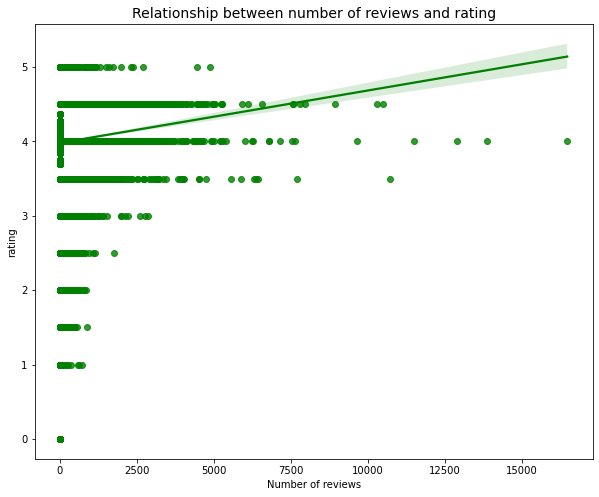

In [65]:
#scatter plot of linear relationship between rating and number of reviews 
plt.figure(figsize=(10,8))
sns.regplot(x='number_of_reviews', y='rating', data=restaurants_reviews_1st_df, color = 'green')
plt.title("Relationship between number of reviews and rating", fontsize=14)
plt.xlabel("Number of reviews")
plt.ylabel("rating");

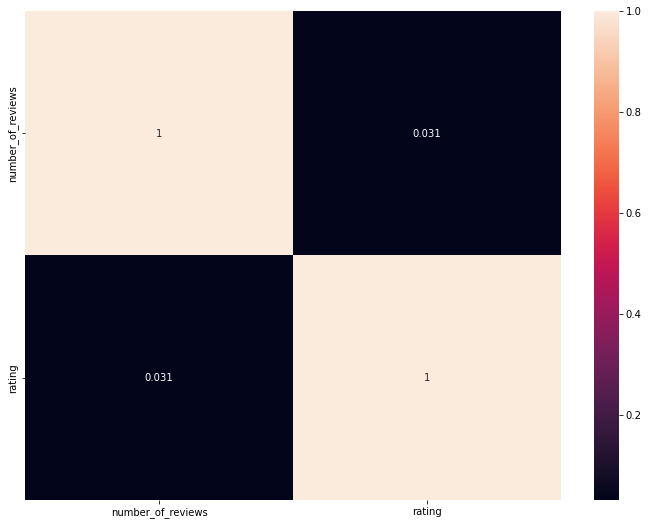

In [66]:
corrmat = restaurants_reviews_1st_df[['number_of_reviews','rating']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True );

<a id='cuisine_styles_analysis'></a>
## 6.3.5 _Analysis of the cuisine styles_

From the the graph below showing the ranking of cuisine styles in terms of number of restaurants, we can notice that __the 'Vegetarian Friendly' and 'European' cuisines are impressively leading__.
The number of restaurants with no cuisine style known comes in 3rd position.

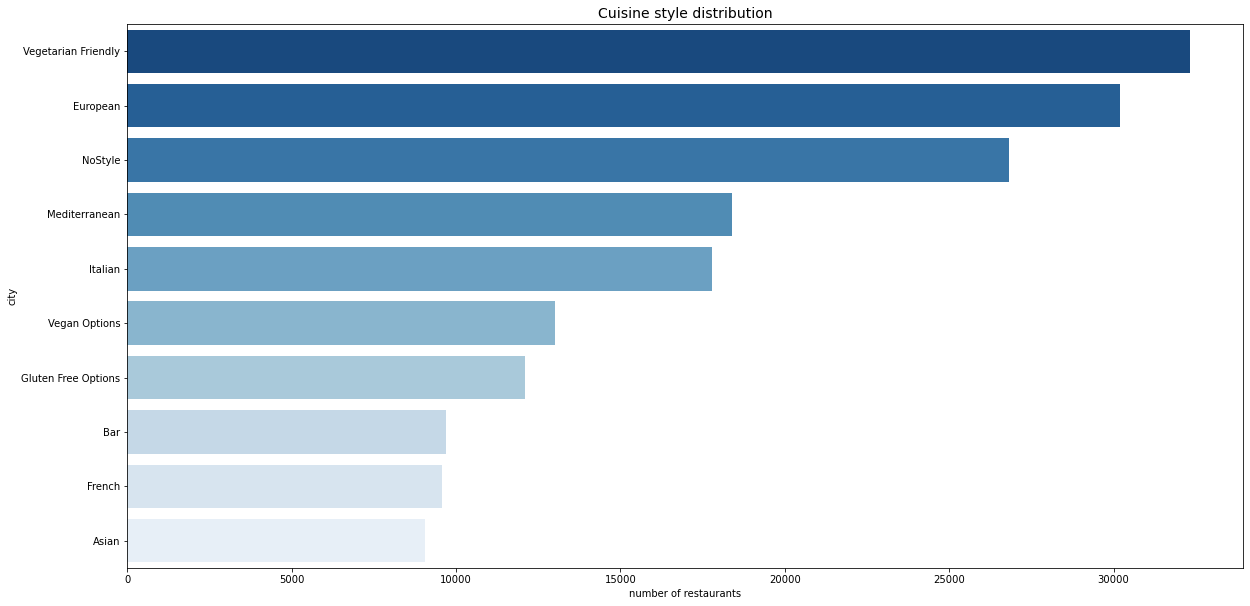

In [89]:
cuisine_style_distribution_1 = restaurants_reviews_2nd_df.groupby(by = 'cuisine_style').restaurant_name.count().sort_values(ascending = False)[:10]
x_values = cuisine_style_distribution_1.values
y_values = cuisine_style_distribution_1.index


plt.figure(figsize=(20,10))
sns.barplot(x=x_values, y=y_values, palette='Blues_r')
plt.title('Cuisine style distribution', fontsize = 14)
plt.xlabel('number of restaurants')
plt.ylabel('city');

__What is the ranking of cuisine styles on a European scale?__

From the graph below showing the __summed number of reviews per cuisine style__, the top 10 are :
- Vegetarian Friendly    
- European               
- Gluten Free Options    
- Vegan Options          
- Mediterranean          
- Italian                
- Bar                    
- French                 
- Pizza                  
- Spanish    

We can safely say that __more customers go to 'Vegetarian Friendly' restaurants on a european scale__! This comes as a surprise! Is this a recent trend in the taste of travellers in Europe?

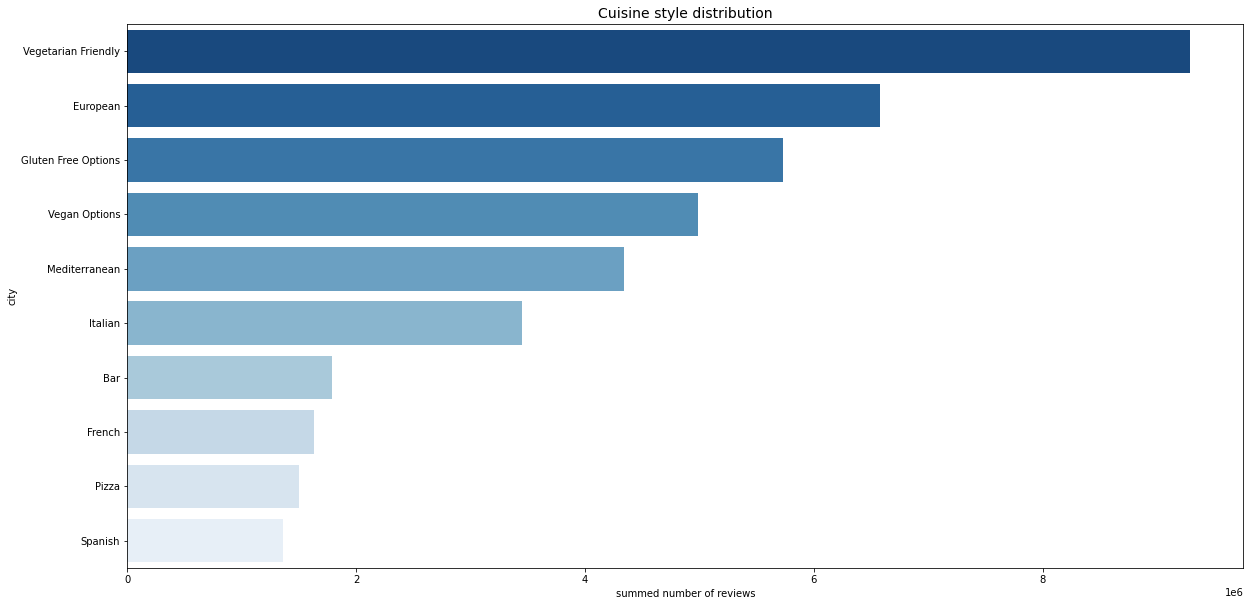

In [88]:
cuisine_style_distribution_2 = restaurants_reviews_2nd_df.groupby(by = 'cuisine_style').number_of_reviews.sum().sort_values(ascending = False)[:10]
x_values = cuisine_style_distribution_2.values
y_values = cuisine_style_distribution_2.index


plt.figure(figsize=(20,10))
sns.barplot(x=x_values, y=y_values, palette='Blues_r')
plt.title('Cuisine style distribution', fontsize = 14)
plt.xlabel('summed number of reviews')
plt.ylabel('city');

In [69]:
top_10_cuisines = cuisine_style_distribution_2[:10]
top_10_cuisines

cuisine_style
Vegetarian Friendly    9288984
European               6579380
Gluten Free Options    5734170
Vegan Options          4986333
Mediterranean          4336701
Italian                3452669
Bar                    1789452
French                 1629105
Pizza                  1503200
Spanish                1362818
Name: number_of_reviews, dtype: int64

__What can we say about the top 5 cuisine styles per city?__

The below plots show this ranking. The first one is using the number of restaurants and the second one the summed number of reviews. 

We can first notice that in general both plots almost give the same ranking ; ex: Rome.

>__However, there are some cases when a cuisine style is dominant in a city but not in terms of number of reviews (or frequentation)
For instance, The British cuisine in London comes 2nd in terms of number of restaurants, but il falls to 4th position in terms of frequentation.__  
 
>__It seems the 'Vegetarian Friendly' and 'European' cuisines are the most global cuisines styles as they can be found in the top five cuisines styles of each European countries in the dataset. They compete against the national cuisines.__ 

>__In some cities like Paris, Madrid, Lisbon, the national cuisines are still prevalent.
In London, the 'Vegetarian Friendly' is the most prevalent and it wouldn't be exagerated to say that London is the capital of this cuisine.__

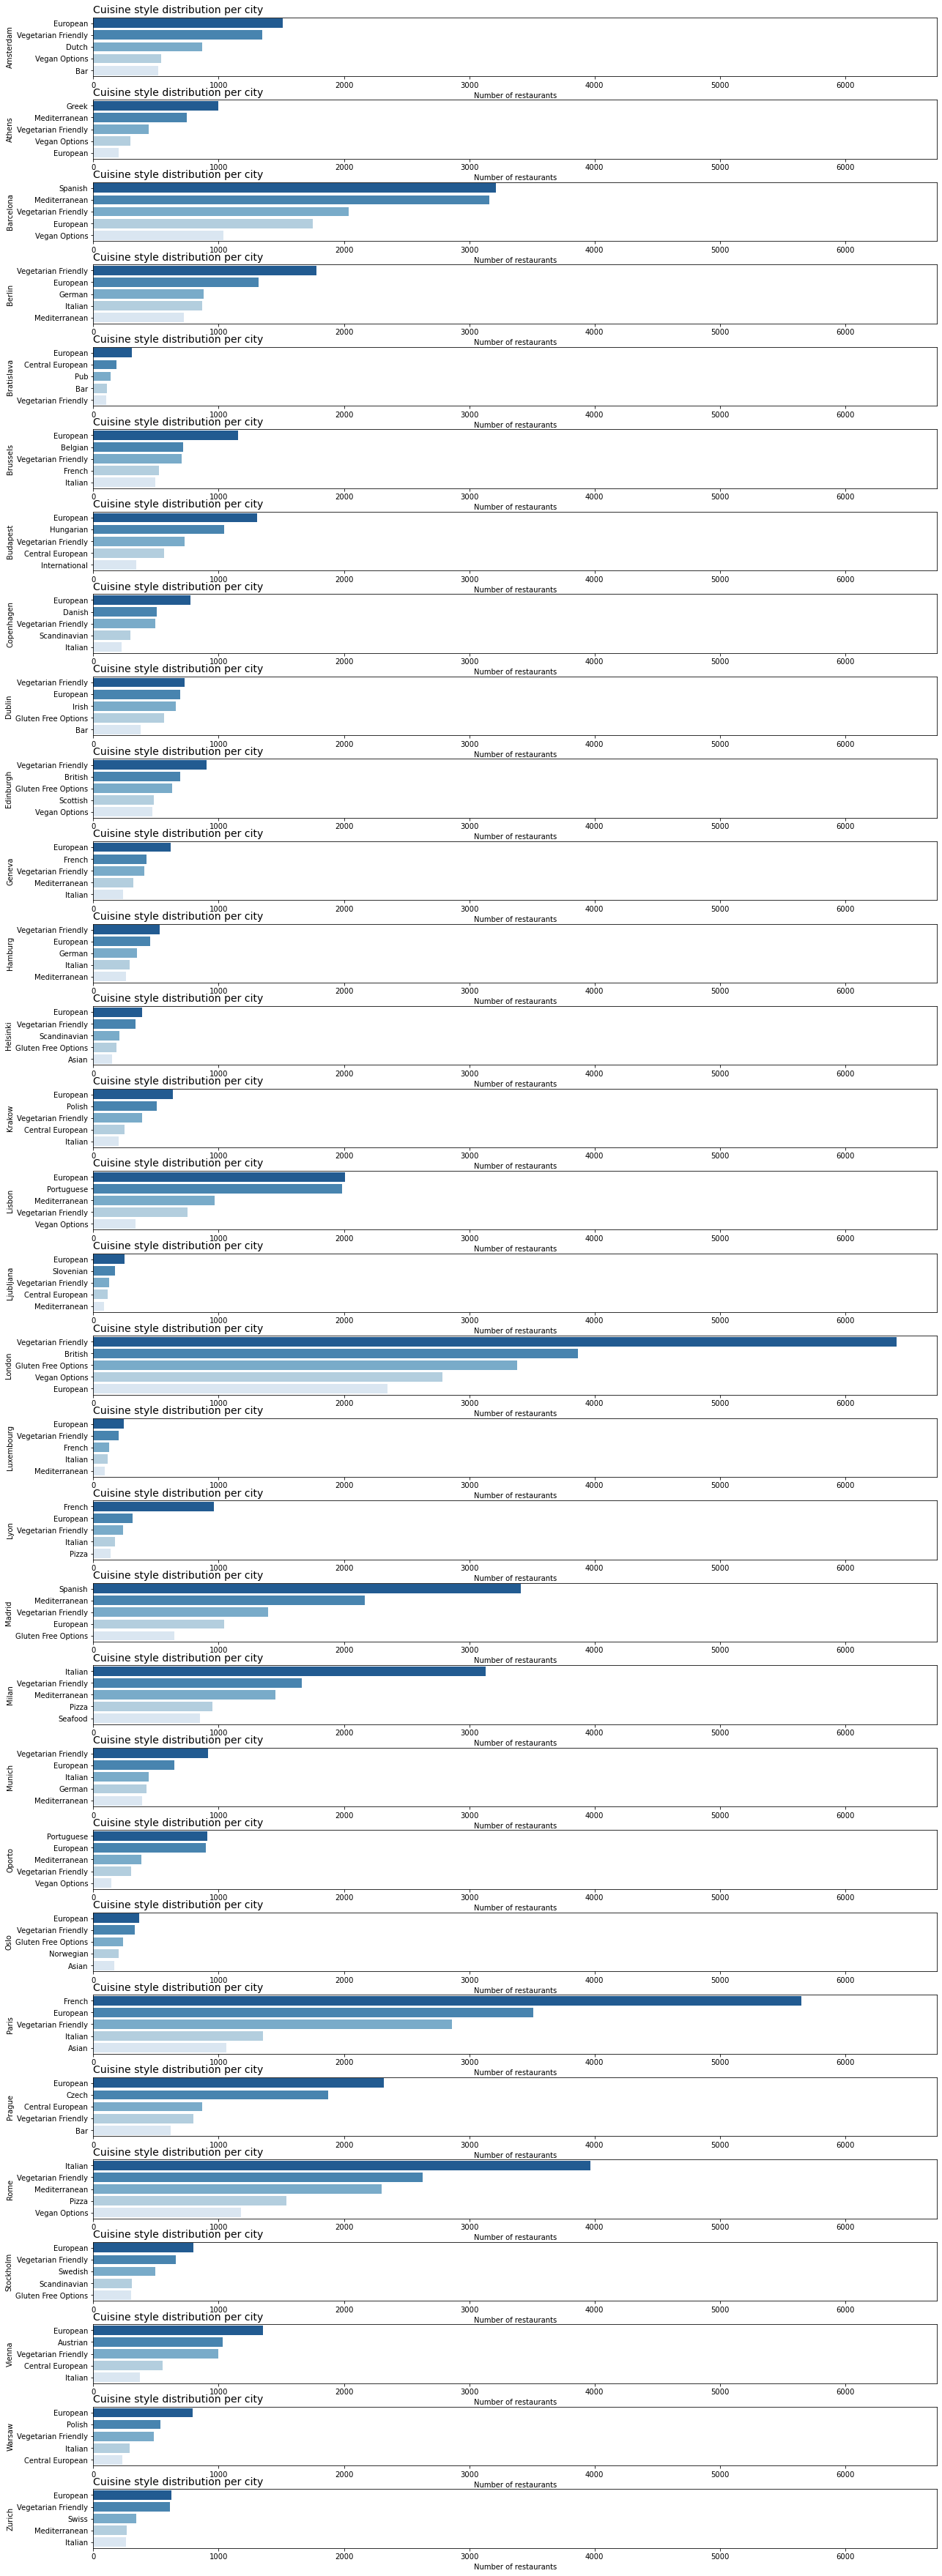

In [70]:
fig, ax = plt.subplots(len(cities_list),1,figsize=(20,60),sharex=True)


for i in range(0,len(cities_list)):
    fig.add_subplot(ax[i])
    mask = (restaurants_reviews_2nd_df.city == cities_list[i]) & \
        (restaurants_reviews_2nd_df.cuisine_style != 'NoStyle')
    scope = restaurants_reviews_2nd_df[mask].groupby(by = ['cuisine_style']).restaurant_name.count().sort_values(ascending = False)[:5].reset_index()
    x_values = scope.restaurant_name.values
    y_values = scope.cuisine_style


    sns.barplot(x=x_values, y=y_values, palette='Blues_r')

    plt.xlabel('Number of restaurants')
    plt.ylabel(cities_list[i]);
    plt.title('Cuisine style distribution per city', fontsize = 14 ,loc='left')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    ax[i].tick_params(axis='both', which='both', labelsize=10, labelbottom=True)


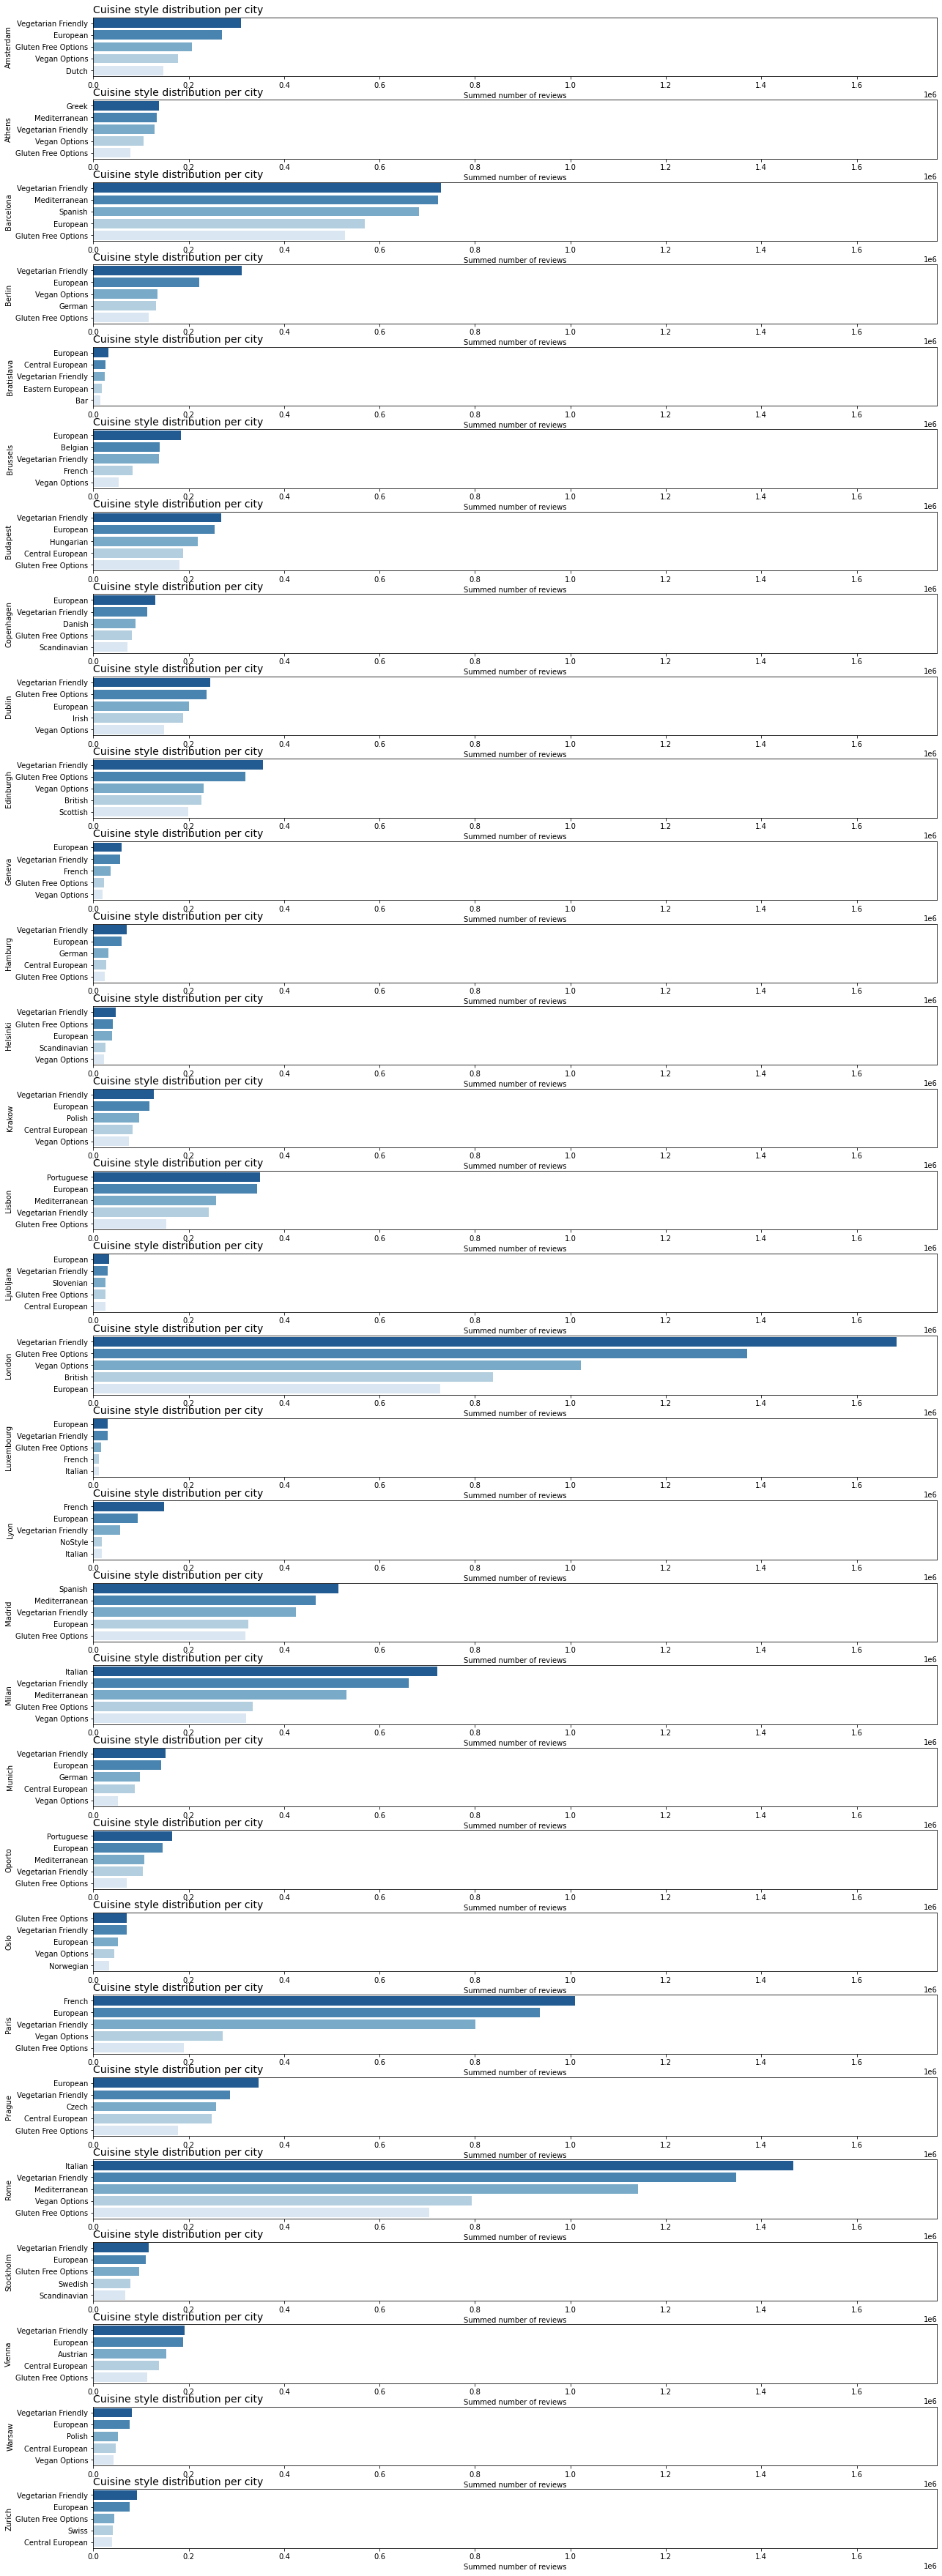

In [71]:
fig, ax = plt.subplots(len(cities_list),1,figsize=(20,60),sharex=True)


for i in range(0,len(cities_list)):
    fig.add_subplot(ax[i])
    mask = restaurants_reviews_2nd_df.city == cities_list[i]
    scope = restaurants_reviews_2nd_df[mask].groupby(by = ['cuisine_style']).number_of_reviews.sum().sort_values(ascending = False)[:5].reset_index()
    x_values = scope.number_of_reviews.values
    y_values = scope.cuisine_style


    sns.barplot(x=x_values, y=y_values, palette='Blues_r')

    plt.xlabel('Summed number of reviews')
    plt.ylabel(cities_list[i]);
    plt.title('Cuisine style distribution per city', fontsize = 14 ,loc='left')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    ax[i].tick_params(axis='both', which='both', labelsize=10, labelbottom=True)


__What can we say about the top 5 cities per cuisine style?__

The below plot shows the ranking in number of restaurants.

>__As shown in it, Paris and London are very often in the top 5. It makes clear that these 2 cities are very global and almost any cuisine style can be found in there.__

>__We can also say that some cuisines styles are less international such as Czech,Danish and Dutch cuisines.__

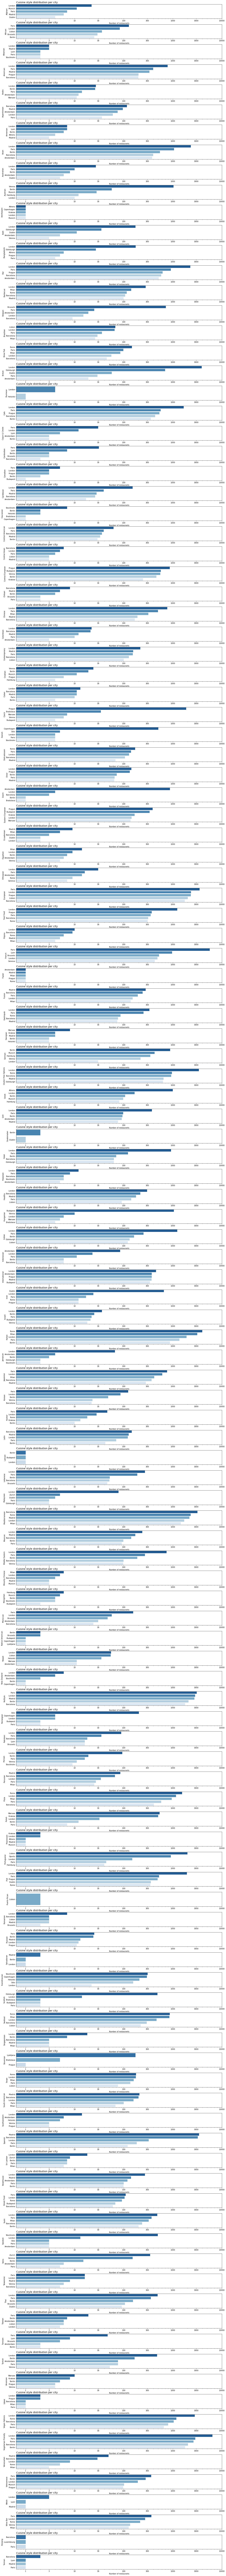

In [72]:
fig, ax = plt.subplots(len(cuisine_style_list),1,figsize=(20,250),sharex=True)


for i in range(0,len(cuisine_style_list)):
    fig.add_subplot(ax[i])
    mask = restaurants_reviews_2nd_df.cuisine_style == cuisine_style_list[i]
    scope = restaurants_reviews_2nd_df[mask].groupby(by = ['city']).restaurant_name.count().sort_values(ascending = False)[:5].reset_index()
    x_values = scope.restaurant_name.values
    y_values = scope.city


    sns.barplot(x=x_values, y=y_values, palette='Blues_r')

    plt.xlabel('Number of restaurants')
    plt.ylabel(cuisine_style_list[i]);
    plt.title('Cuisine style distribution per city', fontsize = 14 ,loc='left')
    plt.xscale('log')
    plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)
    
    ax[i].tick_params(axis='both', which='both', labelsize=10, labelbottom=True)

__What can we say about the average number of reviews per city and cuisine style?__

The below plot shows this ranking.

We can observe some differences compared with the ranking per number of restaurants.

>__Some cuisines styles are prevalent in some cities in terms of number of restaurants. However they are prevalent in other countries in terms of average number of reviews/frquentation.
For instance : Colombian cuisines are prevalent in London and Barcelona in the first list, but it's in Copenhagen that they are the most discussed! British cuisine is prevalent in London but it's in Dublin, we find the best average number of reviews.__ 

>__How comes the city where a cuisine is mostly found is not always the same where they are best talked about. The number of restaurants offering the cuisine style often explain for this bias.__

>__Nonetheless, if you travel in London, you might be interested to eat out in a well rated Dutch restaurant as Dutch cuisine is the best talked about in London compared to other cities! Of course, you might not miss going to a good vegetarian restaurant as London is the capital of this cuisine as it was demonstrated earlier!__

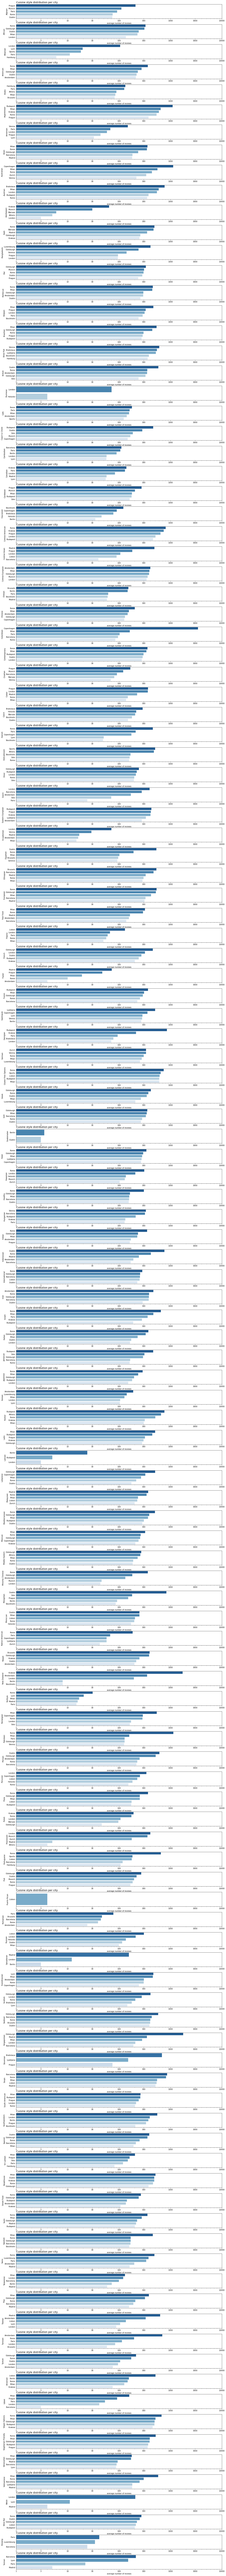

In [73]:
fig, ax = plt.subplots(len(cuisine_style_list),1,figsize=(20,250),sharex=True)


for i in range(0,len(cuisine_style_list)):
    fig.add_subplot(ax[i])
    mask = restaurants_reviews_2nd_df.cuisine_style == cuisine_style_list[i]
    scope = restaurants_reviews_2nd_df[mask].groupby(by = ['city']).number_of_reviews.mean().sort_values(ascending = False)[:5].reset_index()
    x_values = scope.number_of_reviews.values
    y_values = scope.city


    sns.barplot(x=x_values, y=y_values, palette='Blues_r')

    plt.xlabel('average number of reviews')
    plt.ylabel(cuisine_style_list[i]);
    plt.title('Cuisine style distribution per city', fontsize = 14 ,loc='left')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)
    plt.xscale('log')
    plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
    ax[i].tick_params(axis='both', which='both', labelsize=10, labelbottom=True)

__How can we pick up the top 20 restaurants per city and cuisine style?__ 

Let's first exclude restaurants with no cuisine style and with no price range.
So as to create a fair ranking of the restaurants, we will create an attribute `compare_coefficient` which is the rating * the number of reviews. Indeed it wouldn't be fair to use only the rating or only the number of reviews. 


In [74]:
mask_1 = (restaurants_reviews_2nd_df.number_of_reviews !=0) \
        & (restaurants_reviews_2nd_df.rating !=0) \
        & (restaurants_reviews_2nd_df.cuisine_style != 'NoStyle') \
        & (restaurants_reviews_2nd_df.price_range != 'Unknown')

restaurants_narrowed_list_df = restaurants_reviews_2nd_df[mask_1]
restaurants_narrowed_list_df['compare_coefficient'] = restaurants_narrowed_list_df.number_of_reviews * restaurants_narrowed_list_df.rating

best_restaurants_df = pd.DataFrame()

for i in range(0,len(cities_list)):
    for j in range(0,len(cuisine_style_list)):
        mask_2 = (restaurants_narrowed_list_df.city == cities_list[i]) \
                & (restaurants_narrowed_list_df.cuisine_style == cuisine_style_list[j])
        best_restaurants_tmp = restaurants_narrowed_list_df[mask_2].sort_values(by = 'compare_coefficient', ascending = False)[:20]
        best_restaurants_df = best_restaurants_df.append(best_restaurants_tmp)

best_restaurants_df.head()

C:\Users\anhtu\AppData\Local\Temp/ipykernel_5464/3370742297.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_narrowed_list_df['compare_coefficient'] = restaurants_narrowed_list_df.number_of_reviews * restaurants_narrowed_list_df.rating


restaurant_name       city cuisine_style  rating  \
5039                          Mantoe  Amsterdam       Afghani     4.0   
8975                     SNCKBR West  Amsterdam       Afghani     4.0   
8263                          Le Sud  Amsterdam       Afghani     4.5   
3269                          Semhar  Amsterdam       African     4.5   
3625  Laliberla Ethiopian Restaurant  Amsterdam       African     4.5   

     price_range  number_of_reviews  \
5039   Expensive                 89   
8975   Expensive                 25   
8263       Cheap                  9   
3269   Expensive                168   
3625   Expensive                128   

                                                reviews      ID_TA  \
5039  [['Slow service but great food and experience....   d2403467   
8975  [['Original concept', 'Yummy freakshakes and H...  d11955133   
8263  [['Friendly, tasty and cheap', 'The best hummu...   d2701129   
3269  [['Delicious food and lovely service', 'So gla...    d788259   
3625  [['incredible', 'Happy sharing'], ['11/14/2017...   d2315642   

      compare_coefficient  
5039                356.0  
8975                100.0  
8263                 40.5  
3269                756.0  
3625                576.0

__What price ranges can be found in this list of top 20 restaurants per city/cuisine style?__

Let's now plot the result so as to see how these restaurants are distributed among the price ranges. We will focus on the top 10 cuisines found above.

- Vegetarian Friendly    
- European               
- Gluten Free Options    
- Vegan Options          
- Mediterranean          
- Italian                
- Bar                    
- French                 
- Pizza                  
- Spanish 

>As shown below, we can see that __in general the expensive range is prevalent for all cuisine styles in all cities.__

>__It's also reassuring that there is always a good proportion of Medium/Cheap price range restaurants in this list of top 20 restaurants per city/cuisine.
Although excellent quality is generally aligned with Expensive price range, you don't need to spend a fortune to go to the best restaurants in a city!__

>__Moreover, in London, the 'Vegetarian Friendly', 'european', 'Gluten free' , 'Vegan' and 'French' cuisines are prevalent in the Medium price range. 
Because of the fact these cuisines are so commonplace in London, the Medium price range becomes very important in the top list of restaurants. This explains why we have far more reviews in this price range compared to the Expensive range.__

In [75]:
top_20_restaurants_per_cuisine_style_and_city_df = best_restaurants_df.groupby(by = ['city','cuisine_style','price_range']) \
.restaurant_name.count().reset_index()

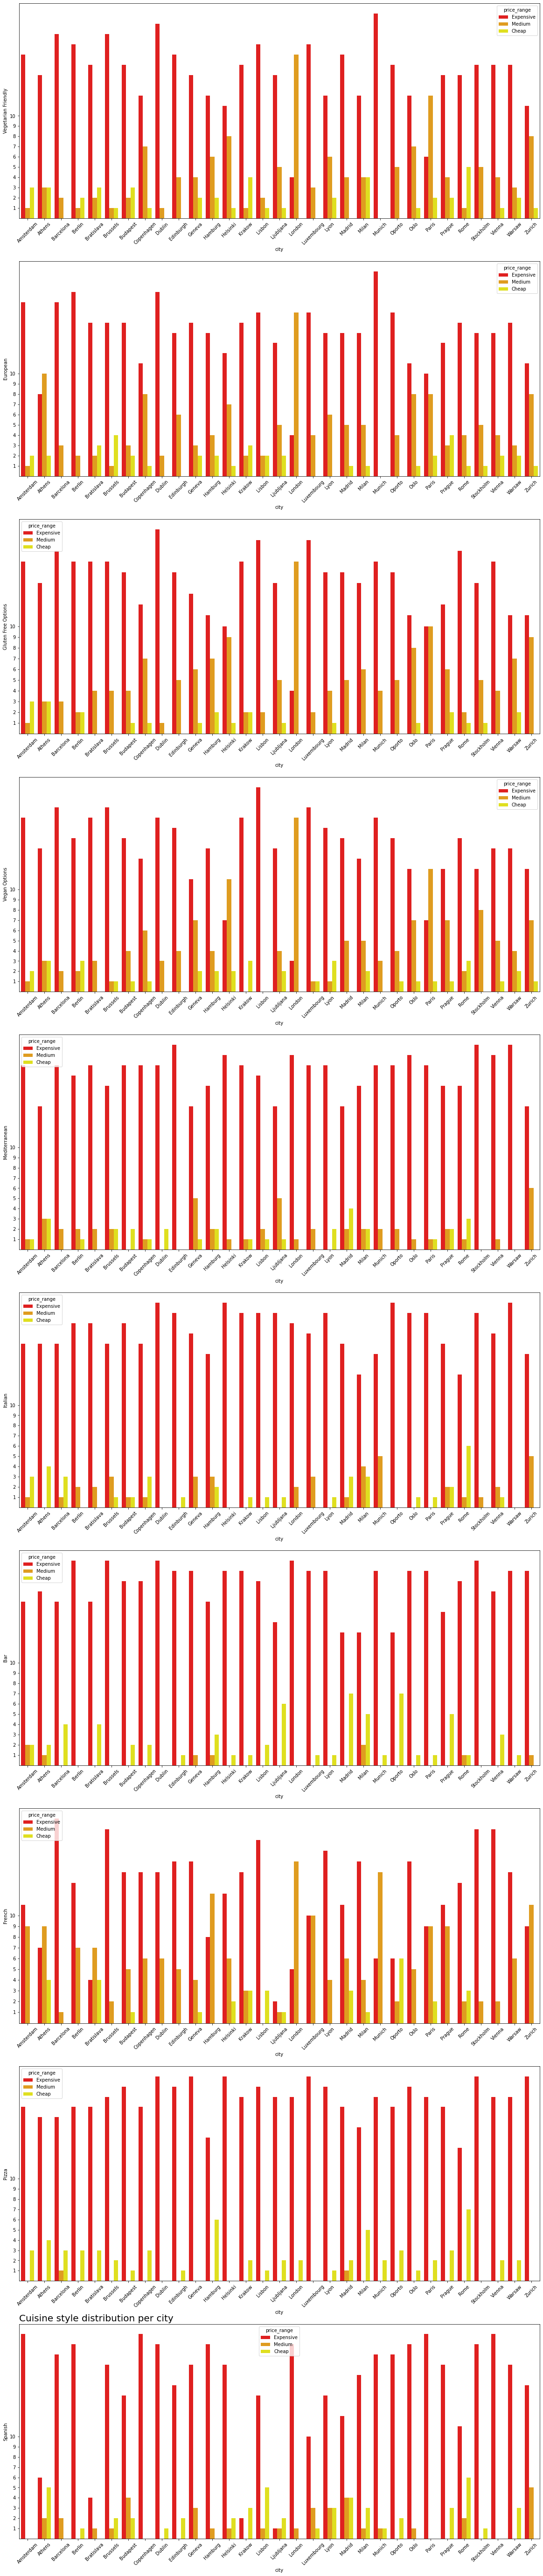

In [76]:

fig, ax = plt.subplots(len(top_10_cuisines.index),1,figsize=(20,100),sharex=True)

plt.title('Cuisine style distribution per city', fontsize = 20 ,loc='left')

for i in range(0,len(top_10_cuisines.index)):
    fig.add_subplot(ax[i])
    mask = (top_20_restaurants_per_cuisine_style_and_city_df.cuisine_style == top_10_cuisines.index[i]) 
    data_plot = top_20_restaurants_per_cuisine_style_and_city_df[mask].reset_index()
    sns.barplot(y= "restaurant_name" , x="city", hue="price_range", data=data_plot,hue_order = ['Expensive','Medium','Cheap'], \
                palette = ['red','orange','yellow'])
    
    plt.xlabel('city',  fontsize = 10)
    ax[i].tick_params(axis='both', which='both', labelsize=10, labelbottom=True)
    
    
    plt.xticks(rotation='45',  fontsize = 10)
    
    plt.ylabel(top_10_cuisines.index[i],  fontsize = 10)
    plt.yticks( [1, 2,3,4,5,6,7,8,9,10],  fontsize = 10)



Below is a list of French restaurants in London from the top 20 French restaurants, and in the Medium price range.

In [77]:
best_restaurants_df.query("cuisine_style == 'French' and city == 'London' and price_range == 'Medium'").sort_values(by = 'compare_coefficient', ascending = False )

restaurant_name    city cuisine_style  rating  \
119950                       The Ivy  London        French     4.5   
120876               The Savoy Grill  London        French     4.0   
119190                        Petrus  London        French     4.5   
118909                 Clos Maggiore  London        French     4.5   
118855                   Le Gavroche  London        French     4.5   
119548  Galvin at Windows Restaurant  London        French     4.5   
118866      Restaurant Gordon Ramsay  London        French     4.5   
118531                   The Ledbury  London        French     4.5   
120677            Galvin La Chapelle  London        French     4.5   
121103    L'Atelier de Joel Robuchon  London        French     4.5   
119843                        Marcus  London        French     4.5   
119038     The Ritz Hotel Restaurant  London        French     4.5   
118980            Roux at The Landau  London        French     4.5   
122356                Sketch Gallery  London        French     4.0   
121042             Langans Brasserie  London        French     4.0   

       price_range  number_of_reviews  \
119950      Medium               5011   
120876      Medium               4514   
119190      Medium               3536   
118909      Medium               3289   
118855      Medium               3161   
119548      Medium               2961   
118866      Medium               2761   
118531      Medium               2535   
120677      Medium               2040   
121103      Medium               1923   
119843      Medium               1903   
119038      Medium               1859   
118980      Medium               1825   
122356      Medium               1984   
121042      Medium               1881   

                                                  reviews     ID_TA  \
119950  [['Lovely chilled lunch', 'Birthday Lunch'], [...   d776287   
120876  [['Great Food, Great wine', 'Birthday Dinner N...   d720797   
119190  [['Christmas Day - a fabulous present!!!', 'Is...  d1744881   
118909  [['A Gem', 'Birthday meal'], ['01/06/2018', '0...  d1015650   
118855  [['Birthday celebrations', 'The best of the be...   d719688   
119548  [['Beautiful views and cocktails', 'Wonderful ...   d730159   
118866  [['Visit with friends', 'Amazing fine dinning ...   d719242   
118531  [['Decades New, A Sublime Evening to Cherish',...   d720761   
120677  [['Almost perfect', 'Fantastic'], ['12/31/2017...  d1645957   
121103  [['World Class food, at a price to match', 'Gr...   d732922   
119843  [['Very good Business dinner', 'Simply perfect...   d720298   
119038  [['Old World Glamour', 'A Fantastic Place For ...  d3638068   
118980  [['Birthday surprise that did not disappoint.....  d1064961   
122356  [['Unique ambience !!', 'A Quirky Experience']...  d2033622   
121042  [['ALWAYSAFUNATMOSPHERE', 'Not as good as my l...   d719668   

        compare_coefficient  
119950              22549.5  
120876              18056.0  
119190              15912.0  
118909              14800.5  
118855              14224.5  
119548              13324.5  
118866              12424.5  
118531              11407.5  
120677               9180.0  
121103               8653.5  
119843               8563.5  
119038               8365.5  
118980               8212.5  
122356               7936.0  
121042               7524.0

<a id='words_in_reviews'></a>
## 6.3.6 _Analysis of the words used in reviews_

We will now try to understand how the words used in reviews can bring more insight into :
- the cuisine style. Let's consider the 'Vegetarian Friendly' cuisine for example's sake.
- the rating, knowing that we found the median of the rating is around 4.

Let's first proceed with a small cleanup of the reviews column. It contains 2 reviews for each restaurant and the date of the reviews. We will extract each word used in the review and work out the frequency of them. 

<a id='reviews_cleanup'></a>
## 6.3.6.1 _cleanup of reviews field and wordcloud_

Let's create a function that will do the cleanup and return a wordcloud with the most frequent works. The arguments of the function are : 
- the rating and which side of the rating we would like to dive into,
- the cuisine style,
- the number of reviews and which side of this number we would like to dive into,
- the city.

The function also returns the mean and the median for `rating` and `number_of_reviews` for information, so we can also use them in argument input of the function.

In [78]:
def reviews_cleanup_and_wordcloud (df, rating_value, rating_operator, city, cuisine_style, \
                                   number_of_reviews, reviews_operator):
    """
    INPUT
    """
    #average rating and average number 
    #of reviews for the city and the cuisine style in arguments:
    
    mask = (df.cuisine_style == cuisine_style) & (df.city == city)
    averages_df =  df[mask]. groupby(by = ['city', 'cuisine_style']).agg({'rating' : ['mean','median'], \
                                                                'number_of_reviews' : ['mean','median']})
    
    mask = "cuisine_style == '" + str(cuisine_style) + "' and city == '" + str(city) \
            + "' and rating " + rating_operator + " " + str(rating_value)  \
            + " and number_of_reviews " + reviews_operator + " " + str(number_of_reviews) 
    restaurants_reviews_list = df.query(mask)['reviews'].values.tolist()

    restaurants_reviews_list = [i.replace("[['",'') for i in restaurants_reviews_list]
    restaurants_reviews_list = [i.replace("']]",'') for i in restaurants_reviews_list]
    restaurants_reviews_list = [i.replace("', '",',') for i in restaurants_reviews_list]
    restaurants_reviews_list = [i.replace("'], ['",',') for i in restaurants_reviews_list]
    
    all_items = []
    for i in restaurants_reviews_list:
        all_items += re.split(",", i, maxsplit=3, flags=0)
    dates_items = []
    for i in all_items:
        match = re.match('\d{1,2}/\d{1,2}/\d{4}', i)
        if match is not None:
            dates_items.append(match.group())

    reviews_items = []
    for i in all_items:
        match = re.match('\d{1,2}/\d{1,2}/\d{4}', i)
        if match is  None:
            reviews_items.append(i)

    words_items = []
    for i in reviews_items:
        words_items += i.split(' ')
    
    stopwords = set(STOPWORDS)
    
    words = Counter(words_items)  
    
    wordcloud = WordCloud(width = 500, height = 700, 
                stopwords = stopwords, #mask = cloudmask,
                collocations = False,
                background_color ='white', 
                min_font_size = 6).generate_from_frequencies(words) 
                      
    plt.figure(figsize = (20, 9), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
    
    return averages_df



<a id='wordcloud_use_case'></a>
## 6.3.6.2 _Use case analysis with wordcloud_

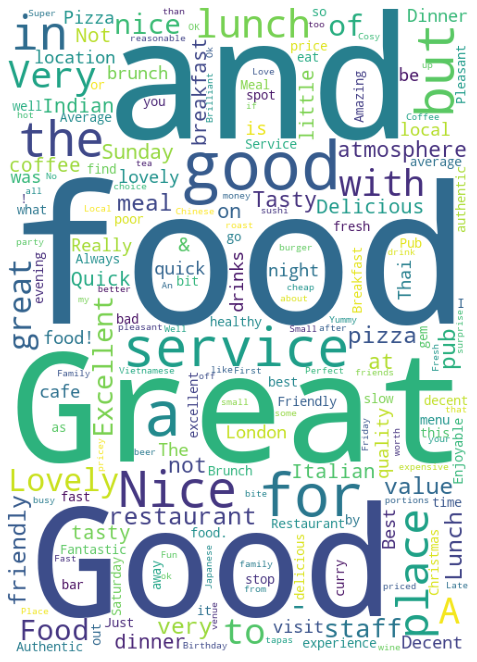

rating        number_of_reviews       
                                mean median              mean median
city   cuisine_style                                                
London Vegetarian Friendly  4.096867    4.0        262.654554  129.5

In [79]:
df = restaurants_reviews_2nd_df
rating_value = '4.09'
operator = '<='
number_of_reviews = '262'
reviews_operator = '<='
city = 'London'
cuisine_style = 'Vegetarian Friendly'

reviews_cleanup_and_wordcloud (df, rating_value, operator, city, cuisine_style, \
                               number_of_reviews, reviews_operator)

We can see that below the average rating of 4.09 and below the average number of reviews, the wordcloud contains positive words.
Let's check what threshold of rating is , under which the words are less good.

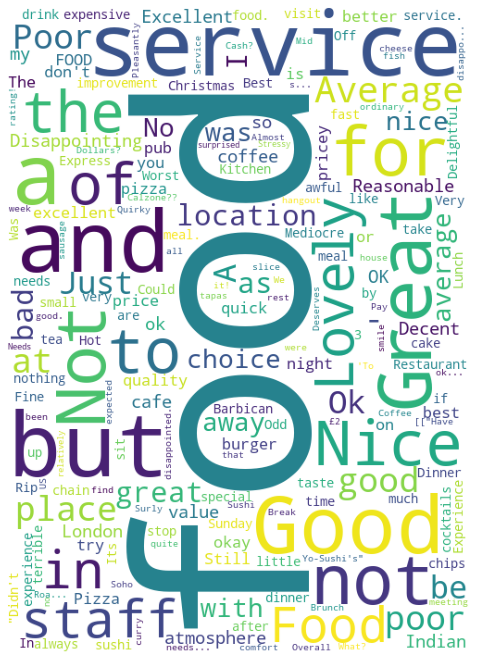

rating        number_of_reviews       
                                mean median              mean median
city   cuisine_style                                                
London Vegetarian Friendly  4.096867    4.0        262.654554  129.5

In [91]:
df = restaurants_reviews_2nd_df
rating_value = '3.4'
operator = '<='
number_of_reviews = '262'
reviews_operator = '<='
city = 'London'
cuisine_style = 'Vegetarian Friendly'

reviews_cleanup_and_wordcloud (df, rating_value, operator, city, cuisine_style, \
                               number_of_reviews, reviews_operator)

As shown above, under 3.5 of rating, the wordcloud starts showing some negative words like "average", "not", "but".
>__We could say that this cuisine style in London is doing good with an average rating of 4.09 as this is above 3.5 under which reviews can be negative.__

<a id='conclusion'></a>
## 7. _Conclusion_

Let's answer now the questions raised in the introduction chapter!

>__If I travel in a City in Europe, what are the most represented cuisine styles I can expect to find?__

If I travel to Rome, I can expect to find the following top 5 cuisines:
- Italian,
- Vegetarian Friendly,
- Mediterranean,
- Vegan Options,
- Gluten Free Options.

I would also know that the Italian cuisine is best talked about in Rome! That's a relief!
Regarding the Vegetarian cuisine, I might be better off eating out in London, as it's the capital for such cuisine. However, the Vegetarian cuisine in Rome may have some local specialties..

>__If I want to eat in a highly rated restaurant, can I expect to find some budget friendly restaurants?__

In Rome, looking at the top 20 restaurants for this cuisine, I can find 5 restaurants in the Cheap price range and 1 in the Mediam range. The same goes for the Vegetarian Friendly cuisine.

>__What are the most global cities in terms of variety of cuisines?__

London and Paris seems to have the largest variety of cuisine styles.

>__What can the words in reviews tell me about the customers sentiment for a given cuisine style in a city?__

The Italian cuisine has the following score in Rome:
- rating :
    - mean : 4.182426	
    - median : 4.0	
- number of reviews :
    - mean : 369.748109	
    - median : 178.0
    
The customer satisfaction is very good at these scores.
It starts decreasing when the rating is below 3.5.

>__Is there a relationship between the rating of a restaurant and the number of reviews?__

We have seen that the number of reviews increases along with the rating. This makes sense, as we would always prefer eating out in a better rated restaurant.

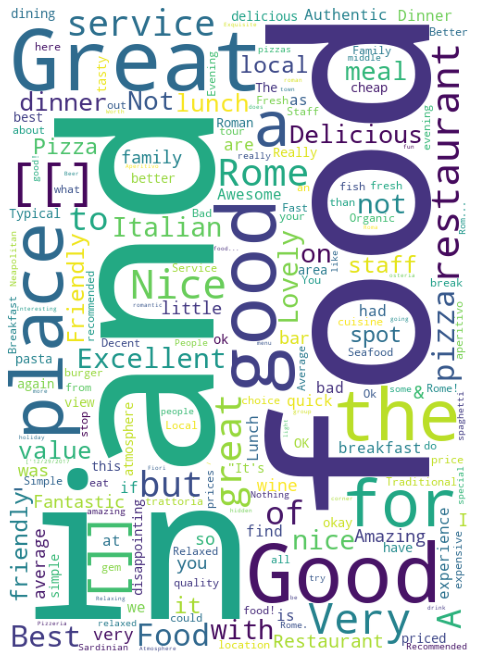

rating        number_of_reviews       
                        mean median              mean median
city cuisine_style                                          
Rome Italian        4.182426    4.0        369.748109  178.0

In [81]:
df = restaurants_reviews_2nd_df
rating_value = '3.5'
operator = '<='
number_of_reviews = '369'
reviews_operator = '<='
city = 'Rome'
cuisine_style = 'Italian'

reviews_cleanup_and_wordcloud (df, rating_value, operator, city, cuisine_style, \
                               number_of_reviews, reviews_operator)